# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [17]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

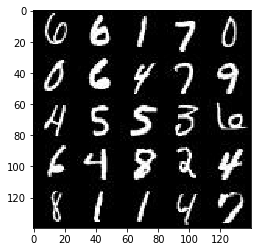

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

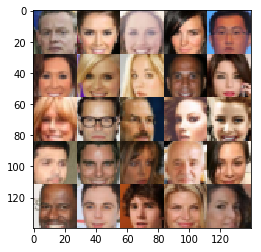

In [19]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [53]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 546kB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [54]:
!pip install -U tensorflow-gpu==1.0

Requirement already up-to-date: tensorflow-gpu==1.0 in /opt/conda/lib/python3.6/site-packages (1.0.0)


In [55]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(dtype=tf.float32, name="input_images", shape=(None, image_width, image_height, image_channels))
    z_data = tf.placeholder(dtype=tf.float32, name="z_data", shape=(None, z_dim))
    learning_rate = tf.placeholder(dtype=tf.float32)
    return (input_images, z_data, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [57]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [36]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    
    with tf.variable_scope('generator',reuse=not is_train):
        x1 = tf.layers.dense(z,7*7*1024)
        
        #7*7*1024
        x1 = tf.reshape(x1, [-1,7,7,1024])
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        #7*7*512
        x2 = tf.layers.conv2d_transpose(x1,512,kernel_size=5,strides=1,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        #14*14*256
        x3 = tf.layers.conv2d_transpose(x2,256,kernel_size=5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(alpha * x3,x3)
        
        #14*14*128
        x4 = tf.layers.conv2d_transpose(x3,128,kernel_size=5,strides=1,padding='same')
        x4 = tf.layers.batch_normalization(x4,training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        
        #28*28*64
        x5 = tf.layers.conv2d_transpose(x4,64,kernel_size=5,strides=2,padding='same')
        x5 = tf.layers.batch_normalization(x5,training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        
        #28*28*3
        x6 = tf.layers.conv2d_transpose(x5,out_channel_dim,kernel_size=5,strides=1,padding='same')
        out = tf.nn.tanh(x6)
    return out

    
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [39]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.2
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [40]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_losses(d_loss, g_loss):
    """
    Plot the discriminator and generator losses on the same graph
    :param d_loss: list of loss values for the discriminator
    :param g_loss: list of loss values for the generator
    """
    fig, ax = plt.subplots()
    plt.plot(d_loss, label='Discriminator', alpha=0.5)
    plt.plot(g_loss, label='Generator', alpha=0.5)
    plt.title("Training Losses")
    plt.legend()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [45]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], len(data_image_mode), z_dim)
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    d_losses = []
    g_losses = []

    nput_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[-1])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # scale batch images to [-1.0, 1.0]
                batch_images = batch_images * 2
                
                # random noise for gen
                batch_z = np.random.uniform(-1,1, size=[batch_size, z_dim])

                #run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr: learning_rate, input_real: batch_images})
                
                if steps % 20 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    d_losses.append(train_loss_d)
                    g_losses.append(train_loss_g)
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g),
                          "Batch: {:.4f}".format(steps))
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
        return d_losses, g_losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.9239... Generator Loss: 0.2309 Batch: 20.0000
Epoch 1/2... Discriminator Loss: 0.5705... Generator Loss: 2.6563 Batch: 40.0000
Epoch 1/2... Discriminator Loss: 3.5611... Generator Loss: 0.0452 Batch: 60.0000
Epoch 1/2... Discriminator Loss: 2.2254... Generator Loss: 0.1434 Batch: 80.0000
Epoch 1/2... Discriminator Loss: 0.7622... Generator Loss: 3.9449 Batch: 100.0000


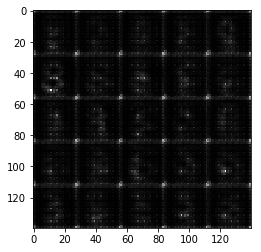

Epoch 1/2... Discriminator Loss: 0.2978... Generator Loss: 1.6764 Batch: 120.0000
Epoch 1/2... Discriminator Loss: 0.6213... Generator Loss: 1.0830 Batch: 140.0000
Epoch 1/2... Discriminator Loss: 0.3304... Generator Loss: 1.5732 Batch: 160.0000
Epoch 1/2... Discriminator Loss: 5.6246... Generator Loss: 4.8985 Batch: 180.0000
Epoch 1/2... Discriminator Loss: 0.3910... Generator Loss: 2.4554 Batch: 200.0000


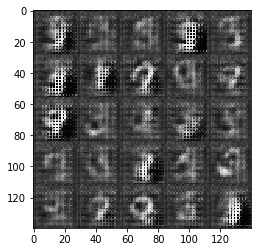

Epoch 1/2... Discriminator Loss: 0.1852... Generator Loss: 3.3278 Batch: 220.0000
Epoch 1/2... Discriminator Loss: 0.9813... Generator Loss: 0.9266 Batch: 240.0000
Epoch 1/2... Discriminator Loss: 0.8658... Generator Loss: 1.5998 Batch: 260.0000
Epoch 1/2... Discriminator Loss: 0.1053... Generator Loss: 3.6485 Batch: 280.0000
Epoch 1/2... Discriminator Loss: 0.7078... Generator Loss: 1.9504 Batch: 300.0000


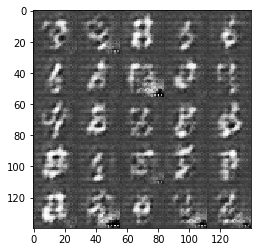

Epoch 1/2... Discriminator Loss: 0.5559... Generator Loss: 1.5348 Batch: 320.0000
Epoch 1/2... Discriminator Loss: 0.6054... Generator Loss: 2.4574 Batch: 340.0000
Epoch 1/2... Discriminator Loss: 0.7077... Generator Loss: 3.0549 Batch: 360.0000
Epoch 1/2... Discriminator Loss: 0.2195... Generator Loss: 4.2483 Batch: 380.0000
Epoch 1/2... Discriminator Loss: 0.5095... Generator Loss: 1.7590 Batch: 400.0000


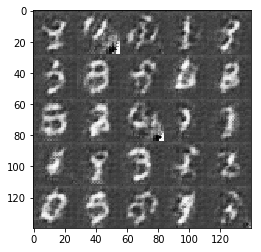

Epoch 1/2... Discriminator Loss: 0.6106... Generator Loss: 1.4239 Batch: 420.0000
Epoch 1/2... Discriminator Loss: 0.2223... Generator Loss: 2.8929 Batch: 440.0000
Epoch 1/2... Discriminator Loss: 0.2730... Generator Loss: 3.0252 Batch: 460.0000
Epoch 1/2... Discriminator Loss: 0.0595... Generator Loss: 6.4599 Batch: 480.0000
Epoch 1/2... Discriminator Loss: 0.1208... Generator Loss: 4.4927 Batch: 500.0000


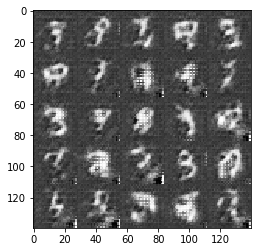

Epoch 1/2... Discriminator Loss: 0.6472... Generator Loss: 1.4503 Batch: 520.0000
Epoch 1/2... Discriminator Loss: 0.0994... Generator Loss: 2.6605 Batch: 540.0000
Epoch 1/2... Discriminator Loss: 1.3795... Generator Loss: 0.7397 Batch: 560.0000
Epoch 1/2... Discriminator Loss: 1.4986... Generator Loss: 0.3000 Batch: 580.0000
Epoch 1/2... Discriminator Loss: 0.7333... Generator Loss: 0.9290 Batch: 600.0000


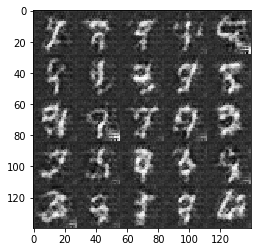

Epoch 1/2... Discriminator Loss: 1.1084... Generator Loss: 1.0711 Batch: 620.0000
Epoch 1/2... Discriminator Loss: 0.7698... Generator Loss: 1.9927 Batch: 640.0000
Epoch 1/2... Discriminator Loss: 3.4618... Generator Loss: 0.0484 Batch: 660.0000
Epoch 1/2... Discriminator Loss: 0.3838... Generator Loss: 1.4113 Batch: 680.0000
Epoch 1/2... Discriminator Loss: 0.8253... Generator Loss: 3.1870 Batch: 700.0000


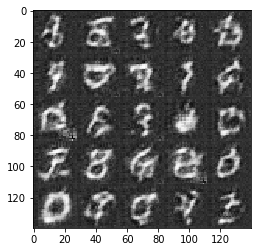

Epoch 1/2... Discriminator Loss: 0.0717... Generator Loss: 4.2761 Batch: 720.0000
Epoch 1/2... Discriminator Loss: 0.1646... Generator Loss: 7.1711 Batch: 740.0000
Epoch 1/2... Discriminator Loss: 0.8624... Generator Loss: 0.8020 Batch: 760.0000
Epoch 1/2... Discriminator Loss: 0.4446... Generator Loss: 1.2519 Batch: 780.0000
Epoch 1/2... Discriminator Loss: 0.2826... Generator Loss: 2.0861 Batch: 800.0000


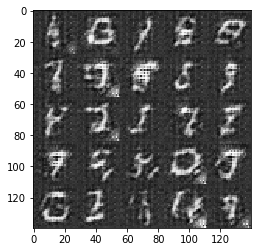

Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 1.3367 Batch: 820.0000
Epoch 1/2... Discriminator Loss: 1.5705... Generator Loss: 0.3162 Batch: 840.0000
Epoch 1/2... Discriminator Loss: 0.1932... Generator Loss: 6.3144 Batch: 860.0000
Epoch 1/2... Discriminator Loss: 0.0412... Generator Loss: 6.3519 Batch: 880.0000
Epoch 1/2... Discriminator Loss: 0.4977... Generator Loss: 2.1064 Batch: 900.0000


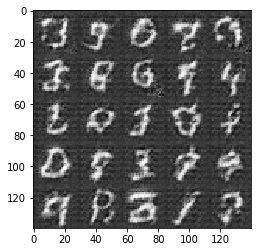

Epoch 1/2... Discriminator Loss: 0.0806... Generator Loss: 4.3425 Batch: 920.0000
Epoch 1/2... Discriminator Loss: 0.0391... Generator Loss: 5.0222 Batch: 940.0000
Epoch 1/2... Discriminator Loss: 1.1838... Generator Loss: 0.5021 Batch: 960.0000
Epoch 1/2... Discriminator Loss: 0.4301... Generator Loss: 1.7927 Batch: 980.0000
Epoch 1/2... Discriminator Loss: 0.3277... Generator Loss: 3.6617 Batch: 1000.0000


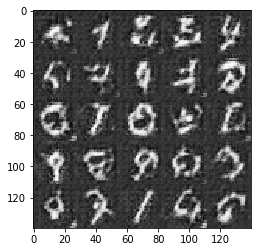

Epoch 1/2... Discriminator Loss: 0.4036... Generator Loss: 1.3463 Batch: 1020.0000
Epoch 1/2... Discriminator Loss: 1.0381... Generator Loss: 0.9065 Batch: 1040.0000
Epoch 1/2... Discriminator Loss: 0.5112... Generator Loss: 1.3854 Batch: 1060.0000
Epoch 1/2... Discriminator Loss: 0.8892... Generator Loss: 0.6554 Batch: 1080.0000
Epoch 1/2... Discriminator Loss: 1.0961... Generator Loss: 0.6557 Batch: 1100.0000


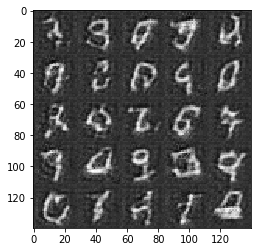

Epoch 1/2... Discriminator Loss: 1.7035... Generator Loss: 0.2712 Batch: 1120.0000
Epoch 1/2... Discriminator Loss: 0.0757... Generator Loss: 4.4164 Batch: 1140.0000
Epoch 1/2... Discriminator Loss: 1.5513... Generator Loss: 0.4007 Batch: 1160.0000
Epoch 1/2... Discriminator Loss: 0.0840... Generator Loss: 4.2838 Batch: 1180.0000
Epoch 1/2... Discriminator Loss: 0.9800... Generator Loss: 0.8735 Batch: 1200.0000


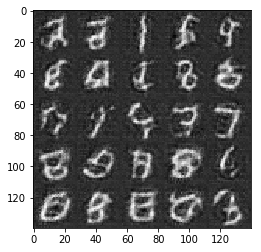

Epoch 1/2... Discriminator Loss: 0.6473... Generator Loss: 7.0603 Batch: 1220.0000
Epoch 1/2... Discriminator Loss: 0.1987... Generator Loss: 2.1916 Batch: 1240.0000
Epoch 1/2... Discriminator Loss: 0.3948... Generator Loss: 1.4772 Batch: 1260.0000
Epoch 1/2... Discriminator Loss: 0.1213... Generator Loss: 2.6962 Batch: 1280.0000
Epoch 1/2... Discriminator Loss: 0.0365... Generator Loss: 4.2639 Batch: 1300.0000


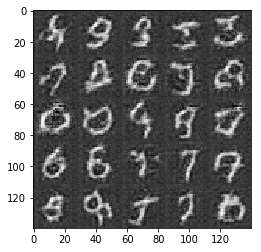

Epoch 1/2... Discriminator Loss: 0.6534... Generator Loss: 1.1121 Batch: 1320.0000
Epoch 1/2... Discriminator Loss: 0.4651... Generator Loss: 1.6552 Batch: 1340.0000
Epoch 1/2... Discriminator Loss: 0.1173... Generator Loss: 5.5123 Batch: 1360.0000
Epoch 1/2... Discriminator Loss: 0.4257... Generator Loss: 1.2434 Batch: 1380.0000
Epoch 1/2... Discriminator Loss: 0.2895... Generator Loss: 2.0254 Batch: 1400.0000


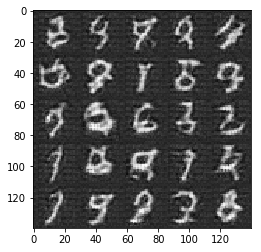

Epoch 1/2... Discriminator Loss: 0.7926... Generator Loss: 0.8743 Batch: 1420.0000
Epoch 1/2... Discriminator Loss: 0.2067... Generator Loss: 4.6199 Batch: 1440.0000
Epoch 1/2... Discriminator Loss: 0.0595... Generator Loss: 5.5040 Batch: 1460.0000
Epoch 1/2... Discriminator Loss: 0.0325... Generator Loss: 5.6973 Batch: 1480.0000
Epoch 1/2... Discriminator Loss: 0.1658... Generator Loss: 6.2452 Batch: 1500.0000


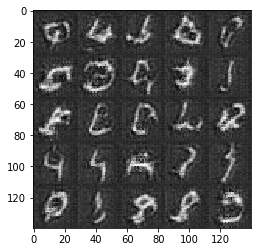

Epoch 1/2... Discriminator Loss: 0.9334... Generator Loss: 1.3739 Batch: 1520.0000
Epoch 1/2... Discriminator Loss: 0.8972... Generator Loss: 1.5461 Batch: 1540.0000
Epoch 1/2... Discriminator Loss: 1.5182... Generator Loss: 0.3833 Batch: 1560.0000
Epoch 1/2... Discriminator Loss: 0.2053... Generator Loss: 5.3138 Batch: 1580.0000
Epoch 1/2... Discriminator Loss: 0.0746... Generator Loss: 4.9358 Batch: 1600.0000


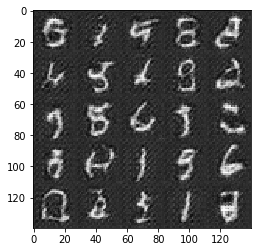

Epoch 1/2... Discriminator Loss: 1.0009... Generator Loss: 0.6331 Batch: 1620.0000
Epoch 1/2... Discriminator Loss: 0.5663... Generator Loss: 1.1138 Batch: 1640.0000
Epoch 1/2... Discriminator Loss: 0.3512... Generator Loss: 1.5206 Batch: 1660.0000
Epoch 1/2... Discriminator Loss: 0.0932... Generator Loss: 2.8393 Batch: 1680.0000
Epoch 1/2... Discriminator Loss: 1.2895... Generator Loss: 0.4578 Batch: 1700.0000


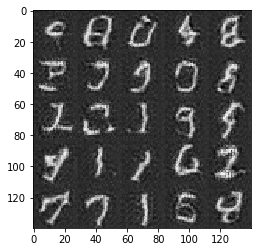

Epoch 1/2... Discriminator Loss: 0.0355... Generator Loss: 4.4544 Batch: 1720.0000
Epoch 1/2... Discriminator Loss: 0.8571... Generator Loss: 1.1059 Batch: 1740.0000
Epoch 1/2... Discriminator Loss: 0.8489... Generator Loss: 0.7339 Batch: 1760.0000
Epoch 1/2... Discriminator Loss: 0.7709... Generator Loss: 2.6970 Batch: 1780.0000
Epoch 1/2... Discriminator Loss: 1.9305... Generator Loss: 0.2125 Batch: 1800.0000


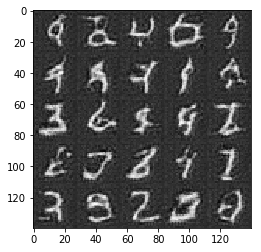

Epoch 1/2... Discriminator Loss: 0.9791... Generator Loss: 1.8456 Batch: 1820.0000
Epoch 1/2... Discriminator Loss: 0.3979... Generator Loss: 1.6580 Batch: 1840.0000
Epoch 1/2... Discriminator Loss: 0.8872... Generator Loss: 1.7806 Batch: 1860.0000
Epoch 1/2... Discriminator Loss: 0.4648... Generator Loss: 1.5038 Batch: 1880.0000
Epoch 1/2... Discriminator Loss: 0.3788... Generator Loss: 1.3559 Batch: 1900.0000


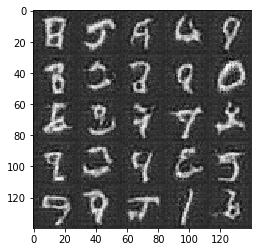

Epoch 1/2... Discriminator Loss: 0.3888... Generator Loss: 1.4905 Batch: 1920.0000
Epoch 1/2... Discriminator Loss: 0.0510... Generator Loss: 5.4135 Batch: 1940.0000
Epoch 1/2... Discriminator Loss: 0.1127... Generator Loss: 2.9214 Batch: 1960.0000
Epoch 1/2... Discriminator Loss: 0.0489... Generator Loss: 5.0157 Batch: 1980.0000
Epoch 1/2... Discriminator Loss: 1.9367... Generator Loss: 0.2278 Batch: 2000.0000


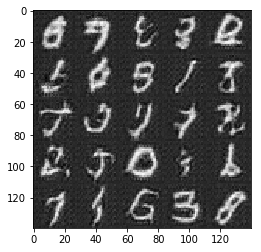

Epoch 1/2... Discriminator Loss: 0.9840... Generator Loss: 1.3091 Batch: 2020.0000
Epoch 1/2... Discriminator Loss: 1.0838... Generator Loss: 0.5738 Batch: 2040.0000
Epoch 1/2... Discriminator Loss: 1.1672... Generator Loss: 3.0111 Batch: 2060.0000
Epoch 1/2... Discriminator Loss: 1.5009... Generator Loss: 0.3331 Batch: 2080.0000
Epoch 1/2... Discriminator Loss: 1.6967... Generator Loss: 0.2940 Batch: 2100.0000


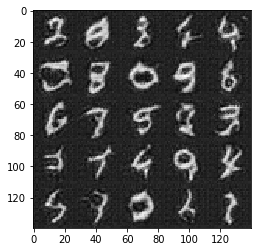

Epoch 1/2... Discriminator Loss: 0.1706... Generator Loss: 2.5064 Batch: 2120.0000
Epoch 1/2... Discriminator Loss: 0.5537... Generator Loss: 1.0969 Batch: 2140.0000
Epoch 1/2... Discriminator Loss: 1.5641... Generator Loss: 0.3517 Batch: 2160.0000
Epoch 1/2... Discriminator Loss: 0.0871... Generator Loss: 3.0132 Batch: 2180.0000
Epoch 1/2... Discriminator Loss: 0.1216... Generator Loss: 3.5090 Batch: 2200.0000


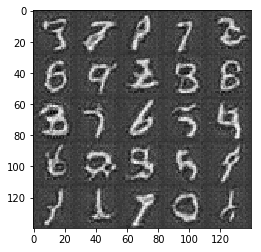

Epoch 1/2... Discriminator Loss: 0.3060... Generator Loss: 4.2895 Batch: 2220.0000
Epoch 1/2... Discriminator Loss: 1.0558... Generator Loss: 0.6186 Batch: 2240.0000
Epoch 1/2... Discriminator Loss: 0.1020... Generator Loss: 4.0535 Batch: 2260.0000
Epoch 1/2... Discriminator Loss: 0.7619... Generator Loss: 0.7976 Batch: 2280.0000
Epoch 1/2... Discriminator Loss: 0.2014... Generator Loss: 2.0610 Batch: 2300.0000


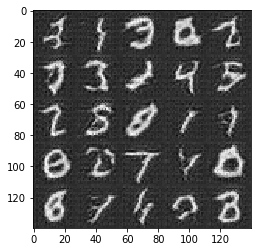

Epoch 1/2... Discriminator Loss: 0.1076... Generator Loss: 4.4403 Batch: 2320.0000
Epoch 1/2... Discriminator Loss: 0.0414... Generator Loss: 5.3017 Batch: 2340.0000
Epoch 1/2... Discriminator Loss: 0.7320... Generator Loss: 1.2720 Batch: 2360.0000
Epoch 1/2... Discriminator Loss: 0.2259... Generator Loss: 5.2431 Batch: 2380.0000
Epoch 1/2... Discriminator Loss: 0.0354... Generator Loss: 4.3566 Batch: 2400.0000


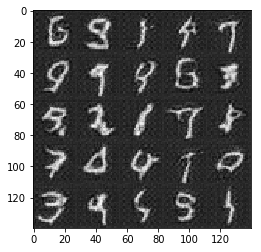

Epoch 1/2... Discriminator Loss: 0.8002... Generator Loss: 0.9097 Batch: 2420.0000
Epoch 1/2... Discriminator Loss: 1.5850... Generator Loss: 2.9284 Batch: 2440.0000
Epoch 1/2... Discriminator Loss: 1.1656... Generator Loss: 0.5311 Batch: 2460.0000
Epoch 1/2... Discriminator Loss: 1.4077... Generator Loss: 0.3911 Batch: 2480.0000
Epoch 1/2... Discriminator Loss: 0.4901... Generator Loss: 1.9958 Batch: 2500.0000


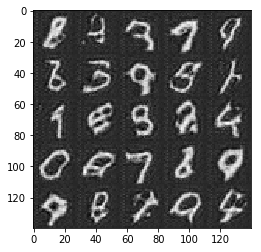

Epoch 1/2... Discriminator Loss: 0.3509... Generator Loss: 1.6421 Batch: 2520.0000
Epoch 1/2... Discriminator Loss: 0.4939... Generator Loss: 1.4239 Batch: 2540.0000
Epoch 1/2... Discriminator Loss: 0.5509... Generator Loss: 1.8085 Batch: 2560.0000
Epoch 1/2... Discriminator Loss: 0.6224... Generator Loss: 1.2930 Batch: 2580.0000
Epoch 1/2... Discriminator Loss: 1.0896... Generator Loss: 3.6412 Batch: 2600.0000


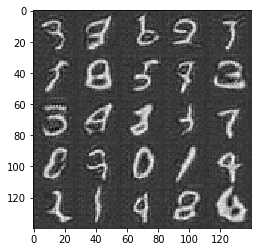

Epoch 1/2... Discriminator Loss: 0.5510... Generator Loss: 1.0681 Batch: 2620.0000
Epoch 1/2... Discriminator Loss: 0.2222... Generator Loss: 2.0436 Batch: 2640.0000
Epoch 1/2... Discriminator Loss: 0.3378... Generator Loss: 1.8802 Batch: 2660.0000
Epoch 1/2... Discriminator Loss: 2.1758... Generator Loss: 4.0073 Batch: 2680.0000
Epoch 1/2... Discriminator Loss: 0.3232... Generator Loss: 3.4214 Batch: 2700.0000


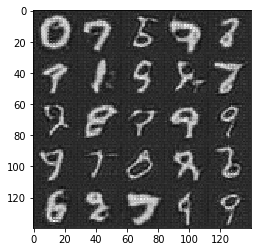

Epoch 1/2... Discriminator Loss: 0.0494... Generator Loss: 7.4446 Batch: 2720.0000
Epoch 1/2... Discriminator Loss: 1.1976... Generator Loss: 1.8082 Batch: 2740.0000
Epoch 1/2... Discriminator Loss: 0.4435... Generator Loss: 1.9164 Batch: 2760.0000
Epoch 1/2... Discriminator Loss: 0.2132... Generator Loss: 1.9997 Batch: 2780.0000
Epoch 1/2... Discriminator Loss: 0.7102... Generator Loss: 1.1926 Batch: 2800.0000


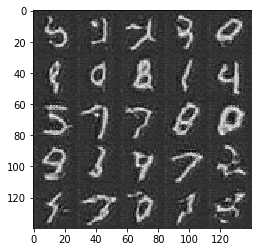

Epoch 1/2... Discriminator Loss: 0.1801... Generator Loss: 2.0139 Batch: 2820.0000
Epoch 1/2... Discriminator Loss: 0.2232... Generator Loss: 5.1006 Batch: 2840.0000
Epoch 1/2... Discriminator Loss: 1.1258... Generator Loss: 1.5597 Batch: 2860.0000
Epoch 1/2... Discriminator Loss: 0.6145... Generator Loss: 1.2623 Batch: 2880.0000
Epoch 1/2... Discriminator Loss: 0.3918... Generator Loss: 1.9878 Batch: 2900.0000


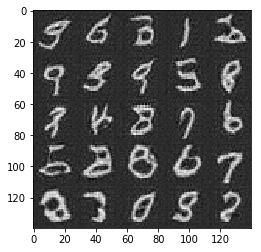

Epoch 1/2... Discriminator Loss: 0.9553... Generator Loss: 0.8271 Batch: 2920.0000
Epoch 1/2... Discriminator Loss: 1.1556... Generator Loss: 0.5546 Batch: 2940.0000
Epoch 1/2... Discriminator Loss: 0.1484... Generator Loss: 2.3417 Batch: 2960.0000
Epoch 1/2... Discriminator Loss: 0.0939... Generator Loss: 3.0504 Batch: 2980.0000
Epoch 1/2... Discriminator Loss: 0.6793... Generator Loss: 5.7789 Batch: 3000.0000


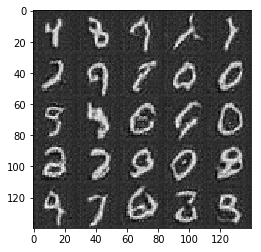

Epoch 1/2... Discriminator Loss: 0.0851... Generator Loss: 3.4700 Batch: 3020.0000
Epoch 1/2... Discriminator Loss: 0.0393... Generator Loss: 3.9913 Batch: 3040.0000
Epoch 1/2... Discriminator Loss: 0.3391... Generator Loss: 1.8786 Batch: 3060.0000
Epoch 1/2... Discriminator Loss: 1.8583... Generator Loss: 5.4073 Batch: 3080.0000
Epoch 1/2... Discriminator Loss: 0.0670... Generator Loss: 7.6050 Batch: 3100.0000


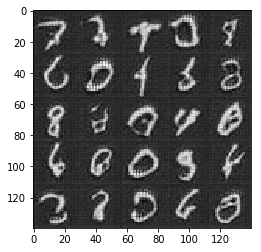

Epoch 1/2... Discriminator Loss: 0.1930... Generator Loss: 2.1531 Batch: 3120.0000
Epoch 1/2... Discriminator Loss: 0.2159... Generator Loss: 2.2234 Batch: 3140.0000
Epoch 1/2... Discriminator Loss: 0.0928... Generator Loss: 3.0231 Batch: 3160.0000
Epoch 1/2... Discriminator Loss: 0.0170... Generator Loss: 5.0886 Batch: 3180.0000
Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 0.4574 Batch: 3200.0000


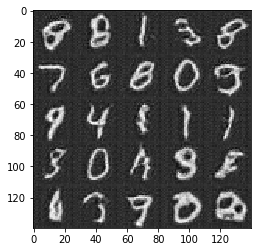

Epoch 1/2... Discriminator Loss: 0.7171... Generator Loss: 1.4271 Batch: 3220.0000
Epoch 1/2... Discriminator Loss: 0.6497... Generator Loss: 1.6098 Batch: 3240.0000
Epoch 1/2... Discriminator Loss: 1.4569... Generator Loss: 0.3547 Batch: 3260.0000
Epoch 1/2... Discriminator Loss: 0.3263... Generator Loss: 1.7529 Batch: 3280.0000
Epoch 1/2... Discriminator Loss: 1.3004... Generator Loss: 1.0053 Batch: 3300.0000


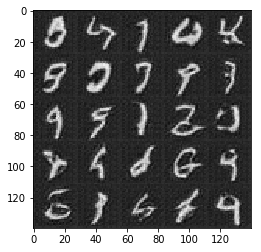

Epoch 1/2... Discriminator Loss: 1.4510... Generator Loss: 0.3720 Batch: 3320.0000
Epoch 1/2... Discriminator Loss: 0.8343... Generator Loss: 0.9419 Batch: 3340.0000
Epoch 1/2... Discriminator Loss: 1.7211... Generator Loss: 0.2727 Batch: 3360.0000
Epoch 1/2... Discriminator Loss: 0.1395... Generator Loss: 2.6290 Batch: 3380.0000
Epoch 1/2... Discriminator Loss: 0.8021... Generator Loss: 0.7552 Batch: 3400.0000


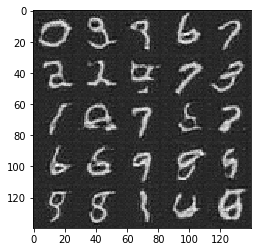

Epoch 1/2... Discriminator Loss: 1.0053... Generator Loss: 2.3283 Batch: 3420.0000
Epoch 1/2... Discriminator Loss: 0.2713... Generator Loss: 1.9303 Batch: 3440.0000
Epoch 1/2... Discriminator Loss: 0.5126... Generator Loss: 1.1398 Batch: 3460.0000
Epoch 1/2... Discriminator Loss: 0.7789... Generator Loss: 0.7595 Batch: 3480.0000
Epoch 1/2... Discriminator Loss: 0.5925... Generator Loss: 1.2907 Batch: 3500.0000


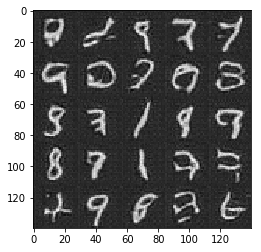

Epoch 1/2... Discriminator Loss: 0.3741... Generator Loss: 1.7812 Batch: 3520.0000
Epoch 1/2... Discriminator Loss: 1.4582... Generator Loss: 0.3201 Batch: 3540.0000
Epoch 1/2... Discriminator Loss: 0.0215... Generator Loss: 6.3599 Batch: 3560.0000
Epoch 1/2... Discriminator Loss: 0.0723... Generator Loss: 3.0676 Batch: 3580.0000
Epoch 1/2... Discriminator Loss: 0.5853... Generator Loss: 4.8109 Batch: 3600.0000


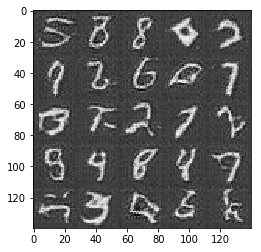

Epoch 1/2... Discriminator Loss: 0.1879... Generator Loss: 2.4034 Batch: 3620.0000
Epoch 1/2... Discriminator Loss: 0.0203... Generator Loss: 6.9853 Batch: 3640.0000
Epoch 1/2... Discriminator Loss: 0.2507... Generator Loss: 1.9184 Batch: 3660.0000
Epoch 1/2... Discriminator Loss: 0.0175... Generator Loss: 6.3906 Batch: 3680.0000
Epoch 1/2... Discriminator Loss: 0.1875... Generator Loss: 2.1780 Batch: 3700.0000


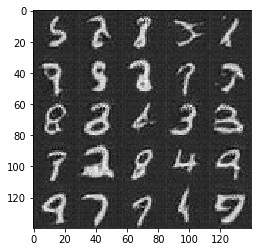

Epoch 1/2... Discriminator Loss: 2.2967... Generator Loss: 0.2250 Batch: 3720.0000
Epoch 1/2... Discriminator Loss: 0.4652... Generator Loss: 1.6419 Batch: 3740.0000
Epoch 2/2... Discriminator Loss: 0.7037... Generator Loss: 1.2626 Batch: 3760.0000
Epoch 2/2... Discriminator Loss: 0.6264... Generator Loss: 0.9442 Batch: 3780.0000
Epoch 2/2... Discriminator Loss: 0.3717... Generator Loss: 2.0431 Batch: 3800.0000


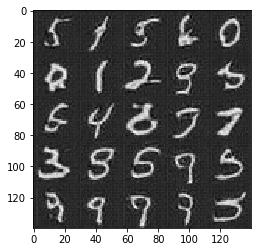

Epoch 2/2... Discriminator Loss: 0.1389... Generator Loss: 2.5427 Batch: 3820.0000
Epoch 2/2... Discriminator Loss: 0.6717... Generator Loss: 1.1853 Batch: 3840.0000
Epoch 2/2... Discriminator Loss: 0.6221... Generator Loss: 1.4114 Batch: 3860.0000
Epoch 2/2... Discriminator Loss: 1.2252... Generator Loss: 0.5194 Batch: 3880.0000
Epoch 2/2... Discriminator Loss: 0.5812... Generator Loss: 1.2455 Batch: 3900.0000


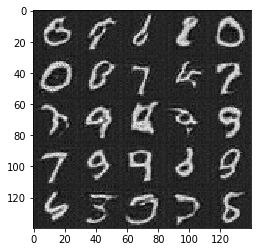

Epoch 2/2... Discriminator Loss: 1.7684... Generator Loss: 0.2208 Batch: 3920.0000
Epoch 2/2... Discriminator Loss: 1.4763... Generator Loss: 0.3883 Batch: 3940.0000
Epoch 2/2... Discriminator Loss: 0.0314... Generator Loss: 5.4487 Batch: 3960.0000
Epoch 2/2... Discriminator Loss: 0.5399... Generator Loss: 1.0903 Batch: 3980.0000
Epoch 2/2... Discriminator Loss: 0.8294... Generator Loss: 4.6512 Batch: 4000.0000


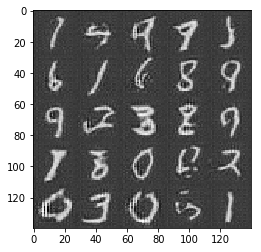

Epoch 2/2... Discriminator Loss: 0.5644... Generator Loss: 1.2024 Batch: 4020.0000
Epoch 2/2... Discriminator Loss: 0.5032... Generator Loss: 1.6501 Batch: 4040.0000
Epoch 2/2... Discriminator Loss: 0.1347... Generator Loss: 2.3401 Batch: 4060.0000
Epoch 2/2... Discriminator Loss: 0.5282... Generator Loss: 1.1995 Batch: 4080.0000
Epoch 2/2... Discriminator Loss: 0.1360... Generator Loss: 2.6548 Batch: 4100.0000


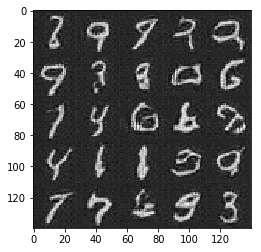

Epoch 2/2... Discriminator Loss: 1.0993... Generator Loss: 7.6535 Batch: 4120.0000
Epoch 2/2... Discriminator Loss: 0.1699... Generator Loss: 2.9432 Batch: 4140.0000
Epoch 2/2... Discriminator Loss: 1.1834... Generator Loss: 1.6173 Batch: 4160.0000
Epoch 2/2... Discriminator Loss: 0.7934... Generator Loss: 0.7308 Batch: 4180.0000
Epoch 2/2... Discriminator Loss: 0.3882... Generator Loss: 1.7021 Batch: 4200.0000


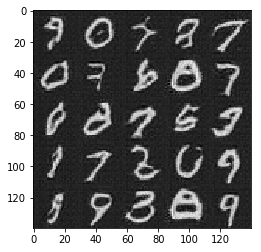

Epoch 2/2... Discriminator Loss: 0.0411... Generator Loss: 4.0934 Batch: 4220.0000
Epoch 2/2... Discriminator Loss: 0.0218... Generator Loss: 6.6630 Batch: 4240.0000
Epoch 2/2... Discriminator Loss: 0.1048... Generator Loss: 2.8094 Batch: 4260.0000
Epoch 2/2... Discriminator Loss: 0.6856... Generator Loss: 0.8214 Batch: 4280.0000
Epoch 2/2... Discriminator Loss: 0.6139... Generator Loss: 1.1210 Batch: 4300.0000


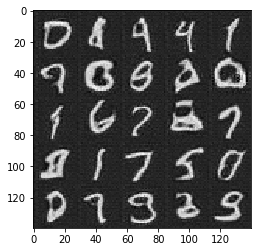

Epoch 2/2... Discriminator Loss: 0.0361... Generator Loss: 4.2853 Batch: 4320.0000
Epoch 2/2... Discriminator Loss: 0.6693... Generator Loss: 4.6058 Batch: 4340.0000
Epoch 2/2... Discriminator Loss: 1.5752... Generator Loss: 0.3759 Batch: 4360.0000
Epoch 2/2... Discriminator Loss: 0.1113... Generator Loss: 5.1642 Batch: 4380.0000
Epoch 2/2... Discriminator Loss: 0.0467... Generator Loss: 4.0761 Batch: 4400.0000


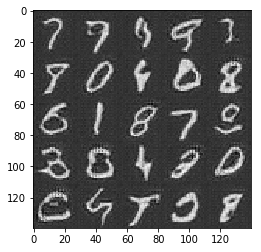

Epoch 2/2... Discriminator Loss: 0.0382... Generator Loss: 4.1604 Batch: 4420.0000
Epoch 2/2... Discriminator Loss: 3.1856... Generator Loss: 5.5221 Batch: 4440.0000
Epoch 2/2... Discriminator Loss: 0.5805... Generator Loss: 1.5458 Batch: 4460.0000
Epoch 2/2... Discriminator Loss: 0.7193... Generator Loss: 1.3250 Batch: 4480.0000
Epoch 2/2... Discriminator Loss: 1.1831... Generator Loss: 0.4312 Batch: 4500.0000


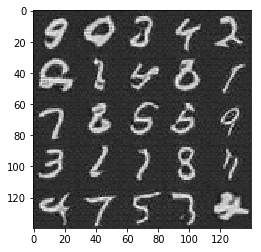

Epoch 2/2... Discriminator Loss: 0.4688... Generator Loss: 2.0792 Batch: 4520.0000
Epoch 2/2... Discriminator Loss: 0.6817... Generator Loss: 1.0849 Batch: 4540.0000
Epoch 2/2... Discriminator Loss: 2.0205... Generator Loss: 0.1704 Batch: 4560.0000
Epoch 2/2... Discriminator Loss: 1.2092... Generator Loss: 0.4976 Batch: 4580.0000
Epoch 2/2... Discriminator Loss: 0.8399... Generator Loss: 0.7610 Batch: 4600.0000


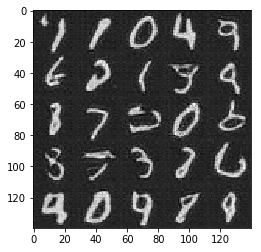

Epoch 2/2... Discriminator Loss: 0.2408... Generator Loss: 5.3168 Batch: 4620.0000
Epoch 2/2... Discriminator Loss: 0.8934... Generator Loss: 0.6949 Batch: 4640.0000
Epoch 2/2... Discriminator Loss: 1.9083... Generator Loss: 6.3159 Batch: 4660.0000
Epoch 2/2... Discriminator Loss: 0.5885... Generator Loss: 3.8879 Batch: 4680.0000
Epoch 2/2... Discriminator Loss: 1.3684... Generator Loss: 0.4737 Batch: 4700.0000


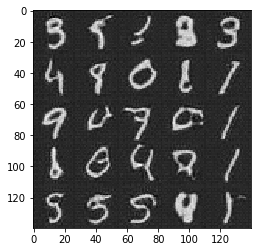

Epoch 2/2... Discriminator Loss: 0.0276... Generator Loss: 5.7767 Batch: 4720.0000
Epoch 2/2... Discriminator Loss: 0.1865... Generator Loss: 2.5326 Batch: 4740.0000
Epoch 2/2... Discriminator Loss: 1.4902... Generator Loss: 0.3589 Batch: 4760.0000
Epoch 2/2... Discriminator Loss: 0.0698... Generator Loss: 4.8313 Batch: 4780.0000
Epoch 2/2... Discriminator Loss: 5.0003... Generator Loss: 6.6602 Batch: 4800.0000


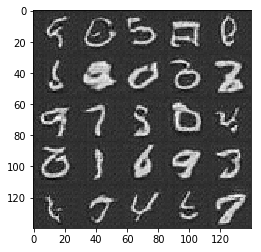

Epoch 2/2... Discriminator Loss: 0.9282... Generator Loss: 0.7380 Batch: 4820.0000
Epoch 2/2... Discriminator Loss: 0.3791... Generator Loss: 1.9679 Batch: 4840.0000
Epoch 2/2... Discriminator Loss: 0.7487... Generator Loss: 0.9895 Batch: 4860.0000
Epoch 2/2... Discriminator Loss: 0.2565... Generator Loss: 3.8583 Batch: 4880.0000
Epoch 2/2... Discriminator Loss: 0.4836... Generator Loss: 1.9299 Batch: 4900.0000


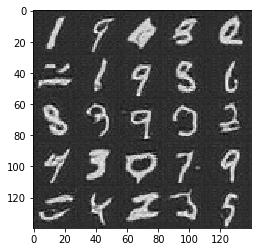

Epoch 2/2... Discriminator Loss: 1.1145... Generator Loss: 0.6815 Batch: 4920.0000
Epoch 2/2... Discriminator Loss: 0.6486... Generator Loss: 2.4951 Batch: 4940.0000
Epoch 2/2... Discriminator Loss: 1.0027... Generator Loss: 0.6779 Batch: 4960.0000
Epoch 2/2... Discriminator Loss: 0.6603... Generator Loss: 1.0331 Batch: 4980.0000
Epoch 2/2... Discriminator Loss: 0.8299... Generator Loss: 0.8570 Batch: 5000.0000


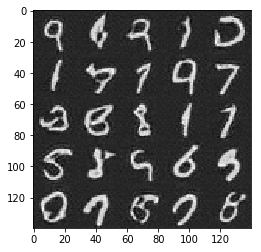

Epoch 2/2... Discriminator Loss: 0.0850... Generator Loss: 3.2740 Batch: 5020.0000
Epoch 2/2... Discriminator Loss: 0.0464... Generator Loss: 4.4578 Batch: 5040.0000
Epoch 2/2... Discriminator Loss: 0.1850... Generator Loss: 2.2840 Batch: 5060.0000
Epoch 2/2... Discriminator Loss: 1.1981... Generator Loss: 0.4581 Batch: 5080.0000
Epoch 2/2... Discriminator Loss: 0.3408... Generator Loss: 1.4609 Batch: 5100.0000


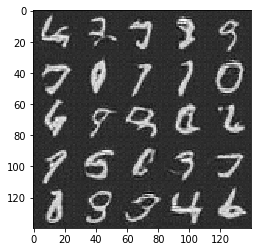

Epoch 2/2... Discriminator Loss: 0.5692... Generator Loss: 1.2705 Batch: 5120.0000
Epoch 2/2... Discriminator Loss: 0.3508... Generator Loss: 1.4466 Batch: 5140.0000
Epoch 2/2... Discriminator Loss: 0.4131... Generator Loss: 1.3038 Batch: 5160.0000
Epoch 2/2... Discriminator Loss: 0.3233... Generator Loss: 1.7059 Batch: 5180.0000
Epoch 2/2... Discriminator Loss: 1.0222... Generator Loss: 2.7109 Batch: 5200.0000


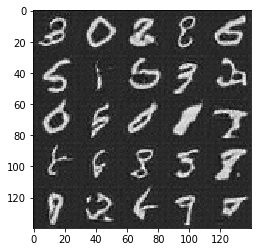

Epoch 2/2... Discriminator Loss: 0.4062... Generator Loss: 1.3572 Batch: 5220.0000
Epoch 2/2... Discriminator Loss: 1.9776... Generator Loss: 0.2310 Batch: 5240.0000
Epoch 2/2... Discriminator Loss: 1.6455... Generator Loss: 0.2807 Batch: 5260.0000
Epoch 2/2... Discriminator Loss: 1.2886... Generator Loss: 0.4493 Batch: 5280.0000
Epoch 2/2... Discriminator Loss: 0.2305... Generator Loss: 3.6477 Batch: 5300.0000


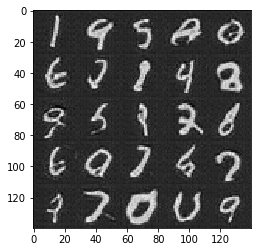

Epoch 2/2... Discriminator Loss: 0.8929... Generator Loss: 0.7462 Batch: 5320.0000
Epoch 2/2... Discriminator Loss: 2.4640... Generator Loss: 0.1022 Batch: 5340.0000
Epoch 2/2... Discriminator Loss: 0.6076... Generator Loss: 1.0305 Batch: 5360.0000
Epoch 2/2... Discriminator Loss: 0.7176... Generator Loss: 0.9874 Batch: 5380.0000
Epoch 2/2... Discriminator Loss: 0.3904... Generator Loss: 1.5685 Batch: 5400.0000


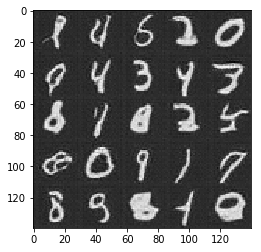

Epoch 2/2... Discriminator Loss: 0.3212... Generator Loss: 1.5421 Batch: 5420.0000
Epoch 2/2... Discriminator Loss: 0.4771... Generator Loss: 1.1518 Batch: 5440.0000
Epoch 2/2... Discriminator Loss: 0.8774... Generator Loss: 0.8298 Batch: 5460.0000
Epoch 2/2... Discriminator Loss: 0.4623... Generator Loss: 1.2635 Batch: 5480.0000
Epoch 2/2... Discriminator Loss: 0.2765... Generator Loss: 1.8730 Batch: 5500.0000


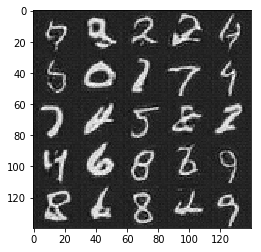

Epoch 2/2... Discriminator Loss: 2.4725... Generator Loss: 0.1199 Batch: 5520.0000
Epoch 2/2... Discriminator Loss: 0.0436... Generator Loss: 5.6094 Batch: 5540.0000
Epoch 2/2... Discriminator Loss: 1.2926... Generator Loss: 0.3792 Batch: 5560.0000
Epoch 2/2... Discriminator Loss: 0.3456... Generator Loss: 2.9979 Batch: 5580.0000
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 0.8294 Batch: 5600.0000


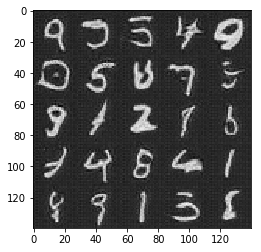

Epoch 2/2... Discriminator Loss: 1.9118... Generator Loss: 3.0559 Batch: 5620.0000
Epoch 2/2... Discriminator Loss: 0.3919... Generator Loss: 5.6021 Batch: 5640.0000
Epoch 2/2... Discriminator Loss: 0.9164... Generator Loss: 0.6244 Batch: 5660.0000
Epoch 2/2... Discriminator Loss: 0.5031... Generator Loss: 1.2225 Batch: 5680.0000
Epoch 2/2... Discriminator Loss: 0.0348... Generator Loss: 4.4125 Batch: 5700.0000


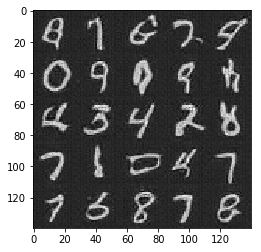

Epoch 2/2... Discriminator Loss: 0.0844... Generator Loss: 2.8379 Batch: 5720.0000
Epoch 2/2... Discriminator Loss: 0.7046... Generator Loss: 3.9858 Batch: 5740.0000
Epoch 2/2... Discriminator Loss: 1.0454... Generator Loss: 0.6606 Batch: 5760.0000
Epoch 2/2... Discriminator Loss: 1.3587... Generator Loss: 0.4132 Batch: 5780.0000
Epoch 2/2... Discriminator Loss: 0.2135... Generator Loss: 2.1289 Batch: 5800.0000


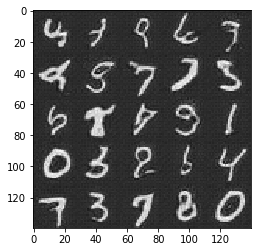

Epoch 2/2... Discriminator Loss: 0.7686... Generator Loss: 0.7998 Batch: 5820.0000
Epoch 2/2... Discriminator Loss: 0.8271... Generator Loss: 0.9560 Batch: 5840.0000
Epoch 2/2... Discriminator Loss: 0.6151... Generator Loss: 1.2810 Batch: 5860.0000
Epoch 2/2... Discriminator Loss: 2.0472... Generator Loss: 0.2057 Batch: 5880.0000
Epoch 2/2... Discriminator Loss: 1.1828... Generator Loss: 0.4713 Batch: 5900.0000


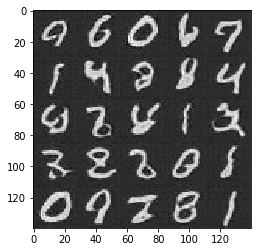

Epoch 2/2... Discriminator Loss: 0.5278... Generator Loss: 1.2522 Batch: 5920.0000
Epoch 2/2... Discriminator Loss: 0.6442... Generator Loss: 0.9752 Batch: 5940.0000
Epoch 2/2... Discriminator Loss: 1.1180... Generator Loss: 0.5296 Batch: 5960.0000
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.2495 Batch: 5980.0000
Epoch 2/2... Discriminator Loss: 0.0318... Generator Loss: 5.1794 Batch: 6000.0000


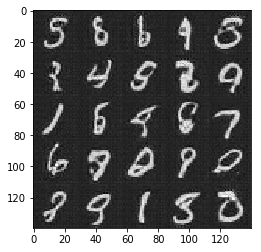

Epoch 2/2... Discriminator Loss: 0.0499... Generator Loss: 3.5265 Batch: 6020.0000
Epoch 2/2... Discriminator Loss: 2.3214... Generator Loss: 0.1563 Batch: 6040.0000
Epoch 2/2... Discriminator Loss: 0.7634... Generator Loss: 0.9347 Batch: 6060.0000
Epoch 2/2... Discriminator Loss: 1.0997... Generator Loss: 5.6491 Batch: 6080.0000
Epoch 2/2... Discriminator Loss: 0.7230... Generator Loss: 1.0958 Batch: 6100.0000


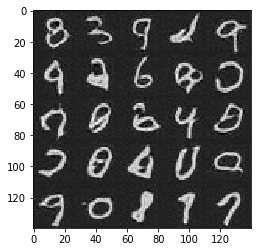

Epoch 2/2... Discriminator Loss: 0.3492... Generator Loss: 2.9621 Batch: 6120.0000
Epoch 2/2... Discriminator Loss: 1.5727... Generator Loss: 0.2979 Batch: 6140.0000
Epoch 2/2... Discriminator Loss: 1.5543... Generator Loss: 0.4086 Batch: 6160.0000
Epoch 2/2... Discriminator Loss: 0.1416... Generator Loss: 2.7111 Batch: 6180.0000
Epoch 2/2... Discriminator Loss: 1.0647... Generator Loss: 2.3735 Batch: 6200.0000


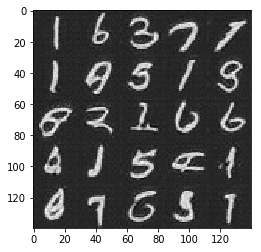

Epoch 2/2... Discriminator Loss: 0.1911... Generator Loss: 4.0660 Batch: 6220.0000
Epoch 2/2... Discriminator Loss: 2.5658... Generator Loss: 0.1177 Batch: 6240.0000
Epoch 2/2... Discriminator Loss: 1.5063... Generator Loss: 0.3323 Batch: 6260.0000
Epoch 2/2... Discriminator Loss: 0.7523... Generator Loss: 0.8899 Batch: 6280.0000
Epoch 2/2... Discriminator Loss: 0.0239... Generator Loss: 4.4871 Batch: 6300.0000


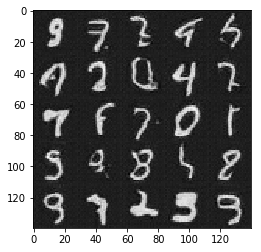

Epoch 2/2... Discriminator Loss: 1.8190... Generator Loss: 0.2629 Batch: 6320.0000
Epoch 2/2... Discriminator Loss: 0.3960... Generator Loss: 4.3338 Batch: 6340.0000
Epoch 2/2... Discriminator Loss: 1.5771... Generator Loss: 0.4612 Batch: 6360.0000
Epoch 2/2... Discriminator Loss: 1.2479... Generator Loss: 0.4715 Batch: 6380.0000
Epoch 2/2... Discriminator Loss: 0.4872... Generator Loss: 2.1198 Batch: 6400.0000


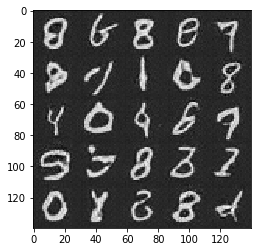

Epoch 2/2... Discriminator Loss: 0.9519... Generator Loss: 0.6908 Batch: 6420.0000
Epoch 2/2... Discriminator Loss: 0.0665... Generator Loss: 4.4196 Batch: 6440.0000
Epoch 2/2... Discriminator Loss: 0.0592... Generator Loss: 5.5053 Batch: 6460.0000
Epoch 2/2... Discriminator Loss: 1.3961... Generator Loss: 3.5999 Batch: 6480.0000
Epoch 2/2... Discriminator Loss: 1.0172... Generator Loss: 0.6521 Batch: 6500.0000


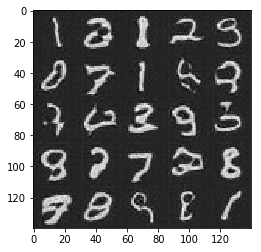

Epoch 2/2... Discriminator Loss: 1.2066... Generator Loss: 0.5369 Batch: 6520.0000
Epoch 2/2... Discriminator Loss: 0.0776... Generator Loss: 3.0061 Batch: 6540.0000
Epoch 2/2... Discriminator Loss: 1.0948... Generator Loss: 0.4952 Batch: 6560.0000
Epoch 2/2... Discriminator Loss: 0.9535... Generator Loss: 0.7781 Batch: 6580.0000
Epoch 2/2... Discriminator Loss: 1.6792... Generator Loss: 0.2850 Batch: 6600.0000


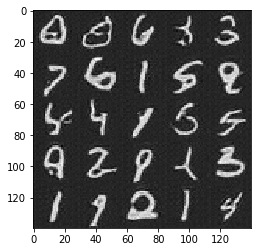

Epoch 2/2... Discriminator Loss: 0.6244... Generator Loss: 1.3454 Batch: 6620.0000
Epoch 2/2... Discriminator Loss: 0.3267... Generator Loss: 1.4723 Batch: 6640.0000
Epoch 2/2... Discriminator Loss: 0.8489... Generator Loss: 3.1434 Batch: 6660.0000
Epoch 2/2... Discriminator Loss: 0.4354... Generator Loss: 2.1547 Batch: 6680.0000
Epoch 2/2... Discriminator Loss: 0.2664... Generator Loss: 1.8874 Batch: 6700.0000


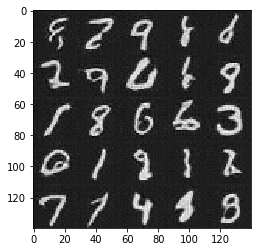

Epoch 2/2... Discriminator Loss: 0.4400... Generator Loss: 4.7765 Batch: 6720.0000
Epoch 2/2... Discriminator Loss: 1.1868... Generator Loss: 0.4532 Batch: 6740.0000
Epoch 2/2... Discriminator Loss: 0.2338... Generator Loss: 2.3795 Batch: 6760.0000
Epoch 2/2... Discriminator Loss: 0.3534... Generator Loss: 1.5617 Batch: 6780.0000
Epoch 2/2... Discriminator Loss: 0.1576... Generator Loss: 2.6943 Batch: 6800.0000


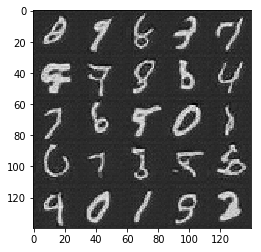

Epoch 2/2... Discriminator Loss: 0.0182... Generator Loss: 5.5436 Batch: 6820.0000
Epoch 2/2... Discriminator Loss: 0.4534... Generator Loss: 1.6459 Batch: 6840.0000
Epoch 2/2... Discriminator Loss: 0.3095... Generator Loss: 1.7309 Batch: 6860.0000
Epoch 2/2... Discriminator Loss: 0.0386... Generator Loss: 4.4028 Batch: 6880.0000
Epoch 2/2... Discriminator Loss: 1.0621... Generator Loss: 0.5808 Batch: 6900.0000


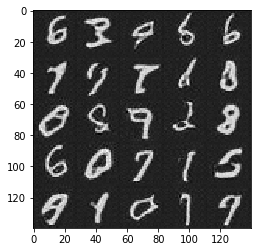

Epoch 2/2... Discriminator Loss: 0.7297... Generator Loss: 2.6163 Batch: 6920.0000
Epoch 2/2... Discriminator Loss: 0.6804... Generator Loss: 1.0566 Batch: 6940.0000
Epoch 2/2... Discriminator Loss: 0.6525... Generator Loss: 2.2031 Batch: 6960.0000
Epoch 2/2... Discriminator Loss: 1.1137... Generator Loss: 0.6637 Batch: 6980.0000
Epoch 2/2... Discriminator Loss: 0.9731... Generator Loss: 0.7451 Batch: 7000.0000


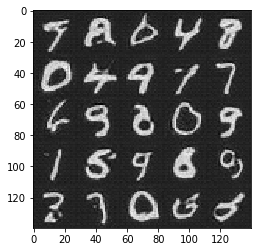

Epoch 2/2... Discriminator Loss: 0.4833... Generator Loss: 1.2024 Batch: 7020.0000
Epoch 2/2... Discriminator Loss: 1.5520... Generator Loss: 5.6947 Batch: 7040.0000
Epoch 2/2... Discriminator Loss: 0.1059... Generator Loss: 4.6610 Batch: 7060.0000
Epoch 2/2... Discriminator Loss: 0.5563... Generator Loss: 1.2580 Batch: 7080.0000
Epoch 2/2... Discriminator Loss: 1.2408... Generator Loss: 0.4108 Batch: 7100.0000


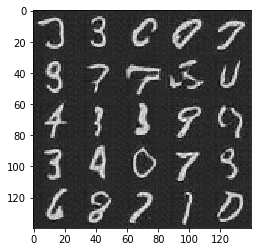

Epoch 2/2... Discriminator Loss: 0.4143... Generator Loss: 1.7289 Batch: 7120.0000
Epoch 2/2... Discriminator Loss: 2.0866... Generator Loss: 0.1718 Batch: 7140.0000
Epoch 2/2... Discriminator Loss: 0.6483... Generator Loss: 1.0281 Batch: 7160.0000
Epoch 2/2... Discriminator Loss: 0.6370... Generator Loss: 1.0247 Batch: 7180.0000
Epoch 2/2... Discriminator Loss: 0.2709... Generator Loss: 1.7712 Batch: 7200.0000


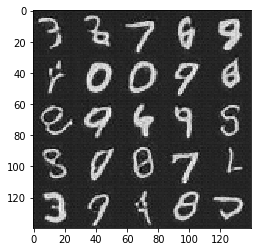

Epoch 2/2... Discriminator Loss: 0.5371... Generator Loss: 1.1561 Batch: 7220.0000
Epoch 2/2... Discriminator Loss: 0.7218... Generator Loss: 2.8681 Batch: 7240.0000
Epoch 2/2... Discriminator Loss: 0.4467... Generator Loss: 1.4746 Batch: 7260.0000
Epoch 2/2... Discriminator Loss: 0.8677... Generator Loss: 0.7738 Batch: 7280.0000
Epoch 2/2... Discriminator Loss: 0.1554... Generator Loss: 2.9633 Batch: 7300.0000


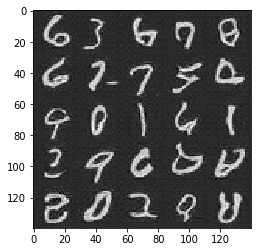

Epoch 2/2... Discriminator Loss: 0.4762... Generator Loss: 1.6051 Batch: 7320.0000
Epoch 2/2... Discriminator Loss: 0.2813... Generator Loss: 3.2408 Batch: 7340.0000
Epoch 2/2... Discriminator Loss: 0.0249... Generator Loss: 5.3962 Batch: 7360.0000
Epoch 2/2... Discriminator Loss: 0.7244... Generator Loss: 0.9596 Batch: 7380.0000
Epoch 2/2... Discriminator Loss: 0.2209... Generator Loss: 2.3967 Batch: 7400.0000


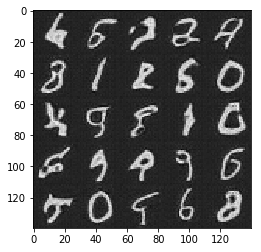

Epoch 2/2... Discriminator Loss: 0.9609... Generator Loss: 0.6375 Batch: 7420.0000
Epoch 2/2... Discriminator Loss: 0.6451... Generator Loss: 1.9851 Batch: 7440.0000
Epoch 2/2... Discriminator Loss: 0.0714... Generator Loss: 3.7735 Batch: 7460.0000
Epoch 2/2... Discriminator Loss: 0.1894... Generator Loss: 2.5975 Batch: 7480.0000
Epoch 2/2... Discriminator Loss: 0.8163... Generator Loss: 0.9644 Batch: 7500.0000


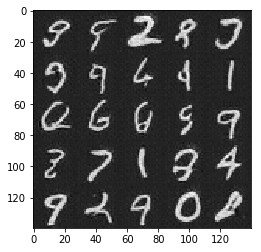

In [17]:
batch_size = 16
z_dim = 128
learning_rate = 0.0004
beta1 = 0.35
d_losses = []
g_losses = []

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    d_losses, g_losses = train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)


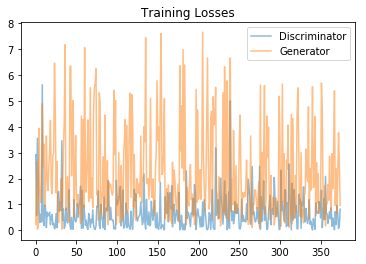

In [18]:
plot_losses(d_losses, g_losses)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2... Discriminator Loss: 0.6426... Generator Loss: 2.0732 Batch: 20.0000
Epoch 1/2... Discriminator Loss: 2.3643... Generator Loss: 0.2461 Batch: 40.0000
Epoch 1/2... Discriminator Loss: 2.0994... Generator Loss: 0.2214 Batch: 60.0000
Epoch 1/2... Discriminator Loss: 1.3982... Generator Loss: 0.8304 Batch: 80.0000
Epoch 1/2... Discriminator Loss: 2.0424... Generator Loss: 0.1871 Batch: 100.0000


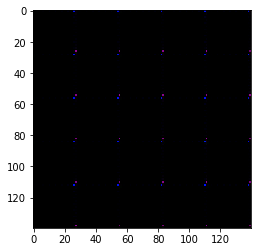

Epoch 1/2... Discriminator Loss: 1.3532... Generator Loss: 0.6373 Batch: 120.0000
Epoch 1/2... Discriminator Loss: 1.4547... Generator Loss: 1.2126 Batch: 140.0000
Epoch 1/2... Discriminator Loss: 1.8102... Generator Loss: 1.1145 Batch: 160.0000
Epoch 1/2... Discriminator Loss: 1.5691... Generator Loss: 0.5012 Batch: 180.0000
Epoch 1/2... Discriminator Loss: 1.5754... Generator Loss: 1.1115 Batch: 200.0000


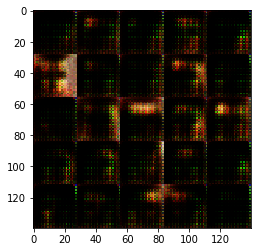

Epoch 1/2... Discriminator Loss: 1.3559... Generator Loss: 0.7183 Batch: 220.0000
Epoch 1/2... Discriminator Loss: 1.1802... Generator Loss: 0.9531 Batch: 240.0000
Epoch 1/2... Discriminator Loss: 1.2500... Generator Loss: 0.4976 Batch: 260.0000
Epoch 1/2... Discriminator Loss: 1.6897... Generator Loss: 0.2838 Batch: 280.0000
Epoch 1/2... Discriminator Loss: 1.3780... Generator Loss: 0.4693 Batch: 300.0000


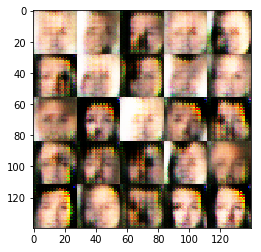

Epoch 1/2... Discriminator Loss: 1.2472... Generator Loss: 0.6883 Batch: 320.0000
Epoch 1/2... Discriminator Loss: 1.6599... Generator Loss: 1.2327 Batch: 340.0000
Epoch 1/2... Discriminator Loss: 1.0962... Generator Loss: 0.7785 Batch: 360.0000
Epoch 1/2... Discriminator Loss: 1.5353... Generator Loss: 0.5128 Batch: 380.0000
Epoch 1/2... Discriminator Loss: 1.4719... Generator Loss: 0.4396 Batch: 400.0000


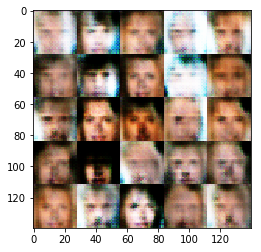

Epoch 1/2... Discriminator Loss: 1.9129... Generator Loss: 0.2372 Batch: 420.0000
Epoch 1/2... Discriminator Loss: 1.6338... Generator Loss: 1.1211 Batch: 440.0000
Epoch 1/2... Discriminator Loss: 1.5377... Generator Loss: 0.4350 Batch: 460.0000
Epoch 1/2... Discriminator Loss: 1.5097... Generator Loss: 0.7415 Batch: 480.0000
Epoch 1/2... Discriminator Loss: 1.2273... Generator Loss: 0.6036 Batch: 500.0000


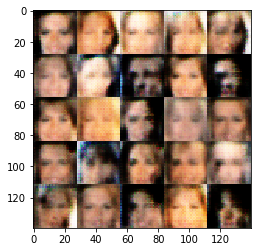

Epoch 1/2... Discriminator Loss: 1.3862... Generator Loss: 0.5691 Batch: 520.0000
Epoch 1/2... Discriminator Loss: 1.4131... Generator Loss: 0.6137 Batch: 540.0000
Epoch 1/2... Discriminator Loss: 1.5569... Generator Loss: 0.7302 Batch: 560.0000
Epoch 1/2... Discriminator Loss: 1.5343... Generator Loss: 0.7996 Batch: 580.0000
Epoch 1/2... Discriminator Loss: 1.2581... Generator Loss: 0.8674 Batch: 600.0000


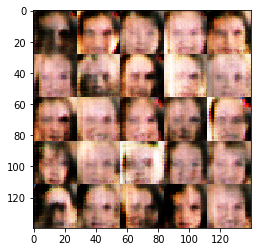

Epoch 1/2... Discriminator Loss: 1.2276... Generator Loss: 0.8603 Batch: 620.0000
Epoch 1/2... Discriminator Loss: 1.4531... Generator Loss: 0.6592 Batch: 640.0000
Epoch 1/2... Discriminator Loss: 1.4584... Generator Loss: 0.5685 Batch: 660.0000
Epoch 1/2... Discriminator Loss: 1.3366... Generator Loss: 0.8193 Batch: 680.0000
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.7391 Batch: 700.0000


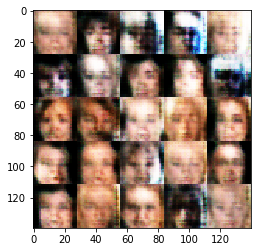

Epoch 1/2... Discriminator Loss: 1.4246... Generator Loss: 0.5521 Batch: 720.0000
Epoch 1/2... Discriminator Loss: 1.4663... Generator Loss: 0.4431 Batch: 740.0000
Epoch 1/2... Discriminator Loss: 1.4412... Generator Loss: 0.5118 Batch: 760.0000
Epoch 1/2... Discriminator Loss: 1.3594... Generator Loss: 0.7690 Batch: 780.0000
Epoch 1/2... Discriminator Loss: 1.3594... Generator Loss: 0.7926 Batch: 800.0000


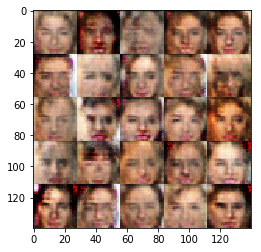

Epoch 1/2... Discriminator Loss: 1.2990... Generator Loss: 0.9137 Batch: 820.0000
Epoch 1/2... Discriminator Loss: 1.2718... Generator Loss: 1.1794 Batch: 840.0000
Epoch 1/2... Discriminator Loss: 1.3098... Generator Loss: 0.6532 Batch: 860.0000
Epoch 1/2... Discriminator Loss: 1.3028... Generator Loss: 0.7540 Batch: 880.0000
Epoch 1/2... Discriminator Loss: 1.3068... Generator Loss: 0.6835 Batch: 900.0000


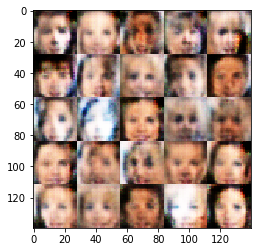

Epoch 1/2... Discriminator Loss: 1.4644... Generator Loss: 0.6999 Batch: 920.0000
Epoch 1/2... Discriminator Loss: 1.4058... Generator Loss: 0.5642 Batch: 940.0000
Epoch 1/2... Discriminator Loss: 1.4134... Generator Loss: 0.4458 Batch: 960.0000
Epoch 1/2... Discriminator Loss: 1.4003... Generator Loss: 1.1939 Batch: 980.0000
Epoch 1/2... Discriminator Loss: 1.4946... Generator Loss: 0.6861 Batch: 1000.0000


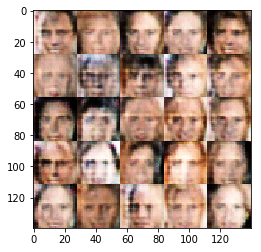

Epoch 1/2... Discriminator Loss: 1.5016... Generator Loss: 0.4507 Batch: 1020.0000
Epoch 1/2... Discriminator Loss: 1.5187... Generator Loss: 0.9368 Batch: 1040.0000
Epoch 1/2... Discriminator Loss: 1.5003... Generator Loss: 0.3943 Batch: 1060.0000
Epoch 1/2... Discriminator Loss: 1.4000... Generator Loss: 0.6947 Batch: 1080.0000
Epoch 1/2... Discriminator Loss: 1.5311... Generator Loss: 0.4228 Batch: 1100.0000


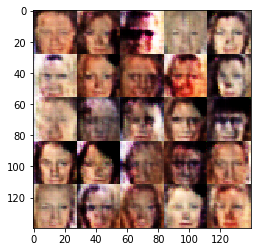

Epoch 1/2... Discriminator Loss: 1.4120... Generator Loss: 0.6853 Batch: 1120.0000
Epoch 1/2... Discriminator Loss: 1.3563... Generator Loss: 0.6240 Batch: 1140.0000
Epoch 1/2... Discriminator Loss: 1.3759... Generator Loss: 0.5112 Batch: 1160.0000
Epoch 1/2... Discriminator Loss: 1.2512... Generator Loss: 0.8554 Batch: 1180.0000
Epoch 1/2... Discriminator Loss: 1.3806... Generator Loss: 0.6412 Batch: 1200.0000


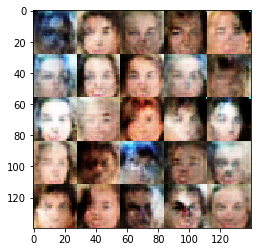

Epoch 1/2... Discriminator Loss: 1.2526... Generator Loss: 0.5187 Batch: 1220.0000
Epoch 1/2... Discriminator Loss: 1.1159... Generator Loss: 1.5411 Batch: 1240.0000
Epoch 1/2... Discriminator Loss: 1.1168... Generator Loss: 0.7052 Batch: 1260.0000
Epoch 1/2... Discriminator Loss: 1.3226... Generator Loss: 0.7399 Batch: 1280.0000
Epoch 1/2... Discriminator Loss: 1.2296... Generator Loss: 0.9410 Batch: 1300.0000


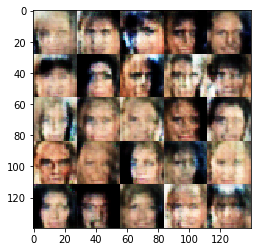

Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 0.6771 Batch: 1320.0000
Epoch 1/2... Discriminator Loss: 1.6422... Generator Loss: 0.5529 Batch: 1340.0000
Epoch 1/2... Discriminator Loss: 1.4556... Generator Loss: 0.4127 Batch: 1360.0000
Epoch 1/2... Discriminator Loss: 1.4174... Generator Loss: 0.6480 Batch: 1380.0000
Epoch 1/2... Discriminator Loss: 1.3914... Generator Loss: 0.6026 Batch: 1400.0000


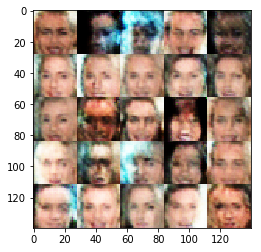

Epoch 1/2... Discriminator Loss: 1.5698... Generator Loss: 0.5346 Batch: 1420.0000
Epoch 1/2... Discriminator Loss: 1.4928... Generator Loss: 0.6181 Batch: 1440.0000
Epoch 1/2... Discriminator Loss: 1.3773... Generator Loss: 0.4598 Batch: 1460.0000
Epoch 1/2... Discriminator Loss: 1.2275... Generator Loss: 0.7939 Batch: 1480.0000
Epoch 1/2... Discriminator Loss: 1.4688... Generator Loss: 1.3424 Batch: 1500.0000


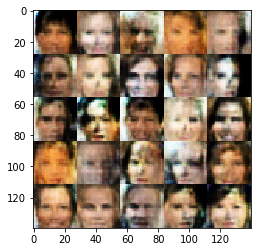

Epoch 1/2... Discriminator Loss: 1.3606... Generator Loss: 0.8461 Batch: 1520.0000
Epoch 1/2... Discriminator Loss: 1.4917... Generator Loss: 0.6164 Batch: 1540.0000
Epoch 1/2... Discriminator Loss: 1.3048... Generator Loss: 0.7159 Batch: 1560.0000
Epoch 1/2... Discriminator Loss: 1.3929... Generator Loss: 0.8155 Batch: 1580.0000
Epoch 1/2... Discriminator Loss: 1.3595... Generator Loss: 0.5446 Batch: 1600.0000


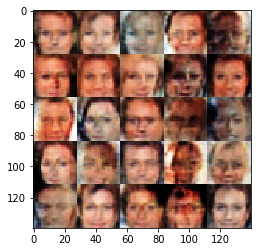

Epoch 1/2... Discriminator Loss: 1.3213... Generator Loss: 0.7359 Batch: 1620.0000
Epoch 1/2... Discriminator Loss: 1.3017... Generator Loss: 0.6534 Batch: 1640.0000
Epoch 1/2... Discriminator Loss: 1.3825... Generator Loss: 0.6447 Batch: 1660.0000
Epoch 1/2... Discriminator Loss: 1.2260... Generator Loss: 0.6743 Batch: 1680.0000
Epoch 1/2... Discriminator Loss: 1.5345... Generator Loss: 0.4140 Batch: 1700.0000


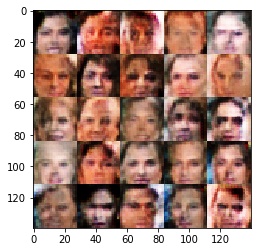

Epoch 1/2... Discriminator Loss: 1.3347... Generator Loss: 0.5753 Batch: 1720.0000
Epoch 1/2... Discriminator Loss: 1.3438... Generator Loss: 0.6479 Batch: 1740.0000
Epoch 1/2... Discriminator Loss: 1.3991... Generator Loss: 0.5963 Batch: 1760.0000
Epoch 1/2... Discriminator Loss: 1.5953... Generator Loss: 0.5308 Batch: 1780.0000
Epoch 1/2... Discriminator Loss: 1.4050... Generator Loss: 0.6632 Batch: 1800.0000


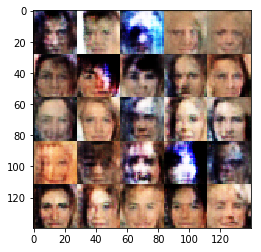

Epoch 1/2... Discriminator Loss: 1.3664... Generator Loss: 0.6769 Batch: 1820.0000
Epoch 1/2... Discriminator Loss: 1.4481... Generator Loss: 0.5827 Batch: 1840.0000
Epoch 1/2... Discriminator Loss: 1.3185... Generator Loss: 0.6514 Batch: 1860.0000
Epoch 1/2... Discriminator Loss: 1.3280... Generator Loss: 0.6091 Batch: 1880.0000
Epoch 1/2... Discriminator Loss: 1.3735... Generator Loss: 0.6470 Batch: 1900.0000


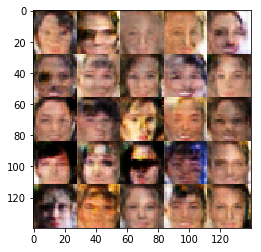

Epoch 1/2... Discriminator Loss: 1.3419... Generator Loss: 0.7376 Batch: 1920.0000
Epoch 1/2... Discriminator Loss: 1.3821... Generator Loss: 0.5327 Batch: 1940.0000
Epoch 1/2... Discriminator Loss: 1.3214... Generator Loss: 0.5298 Batch: 1960.0000
Epoch 1/2... Discriminator Loss: 1.5432... Generator Loss: 1.2088 Batch: 1980.0000
Epoch 1/2... Discriminator Loss: 1.2587... Generator Loss: 0.7852 Batch: 2000.0000


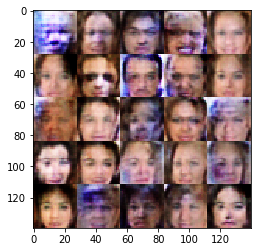

Epoch 1/2... Discriminator Loss: 1.1679... Generator Loss: 0.9656 Batch: 2020.0000
Epoch 1/2... Discriminator Loss: 1.3624... Generator Loss: 0.9006 Batch: 2040.0000
Epoch 1/2... Discriminator Loss: 1.3547... Generator Loss: 0.6776 Batch: 2060.0000
Epoch 1/2... Discriminator Loss: 1.5998... Generator Loss: 0.3744 Batch: 2080.0000
Epoch 1/2... Discriminator Loss: 1.3495... Generator Loss: 0.7136 Batch: 2100.0000


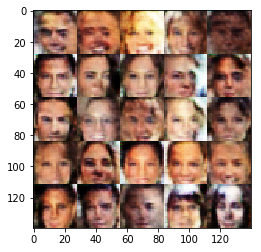

Epoch 1/2... Discriminator Loss: 1.2310... Generator Loss: 0.7597 Batch: 2120.0000
Epoch 1/2... Discriminator Loss: 1.6370... Generator Loss: 1.4421 Batch: 2140.0000
Epoch 1/2... Discriminator Loss: 1.4765... Generator Loss: 0.6313 Batch: 2160.0000
Epoch 1/2... Discriminator Loss: 1.3997... Generator Loss: 0.5978 Batch: 2180.0000
Epoch 1/2... Discriminator Loss: 1.1444... Generator Loss: 0.6455 Batch: 2200.0000


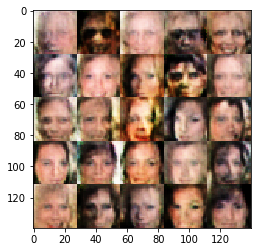

Epoch 1/2... Discriminator Loss: 1.2505... Generator Loss: 0.9710 Batch: 2220.0000
Epoch 1/2... Discriminator Loss: 1.3367... Generator Loss: 0.5558 Batch: 2240.0000
Epoch 1/2... Discriminator Loss: 1.0557... Generator Loss: 1.2004 Batch: 2260.0000
Epoch 1/2... Discriminator Loss: 1.4337... Generator Loss: 0.5934 Batch: 2280.0000
Epoch 1/2... Discriminator Loss: 1.4312... Generator Loss: 0.5602 Batch: 2300.0000


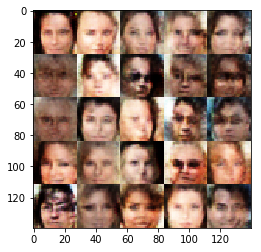

Epoch 1/2... Discriminator Loss: 1.4538... Generator Loss: 0.6607 Batch: 2320.0000
Epoch 1/2... Discriminator Loss: 1.2622... Generator Loss: 0.7590 Batch: 2340.0000
Epoch 1/2... Discriminator Loss: 1.4351... Generator Loss: 0.5099 Batch: 2360.0000
Epoch 1/2... Discriminator Loss: 1.2564... Generator Loss: 0.6644 Batch: 2380.0000
Epoch 1/2... Discriminator Loss: 1.3097... Generator Loss: 0.6362 Batch: 2400.0000


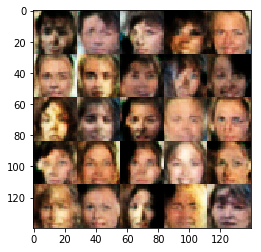

Epoch 1/2... Discriminator Loss: 1.4697... Generator Loss: 0.4899 Batch: 2420.0000
Epoch 1/2... Discriminator Loss: 1.4261... Generator Loss: 0.5008 Batch: 2440.0000
Epoch 1/2... Discriminator Loss: 1.4393... Generator Loss: 0.5890 Batch: 2460.0000
Epoch 1/2... Discriminator Loss: 1.3685... Generator Loss: 0.7640 Batch: 2480.0000
Epoch 1/2... Discriminator Loss: 1.4097... Generator Loss: 0.6017 Batch: 2500.0000


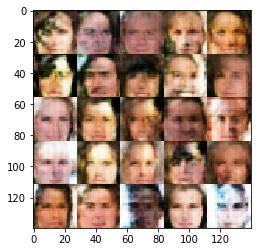

Epoch 1/2... Discriminator Loss: 1.2891... Generator Loss: 0.6917 Batch: 2520.0000
Epoch 1/2... Discriminator Loss: 1.4290... Generator Loss: 0.5972 Batch: 2540.0000
Epoch 1/2... Discriminator Loss: 1.3769... Generator Loss: 0.6388 Batch: 2560.0000
Epoch 1/2... Discriminator Loss: 1.3689... Generator Loss: 0.7639 Batch: 2580.0000
Epoch 1/2... Discriminator Loss: 1.3531... Generator Loss: 0.5636 Batch: 2600.0000


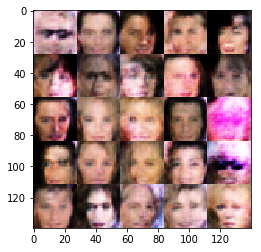

Epoch 1/2... Discriminator Loss: 1.3492... Generator Loss: 0.6135 Batch: 2620.0000
Epoch 1/2... Discriminator Loss: 1.3614... Generator Loss: 0.9269 Batch: 2640.0000
Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 0.6941 Batch: 2660.0000
Epoch 1/2... Discriminator Loss: 1.3875... Generator Loss: 0.5616 Batch: 2680.0000
Epoch 1/2... Discriminator Loss: 1.5198... Generator Loss: 0.4632 Batch: 2700.0000


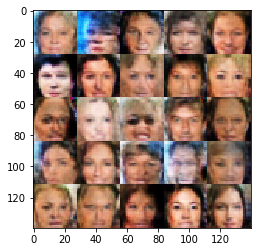

Epoch 1/2... Discriminator Loss: 1.4583... Generator Loss: 0.7042 Batch: 2720.0000
Epoch 1/2... Discriminator Loss: 1.4256... Generator Loss: 0.6091 Batch: 2740.0000
Epoch 1/2... Discriminator Loss: 1.4738... Generator Loss: 1.0892 Batch: 2760.0000
Epoch 1/2... Discriminator Loss: 1.4690... Generator Loss: 0.5023 Batch: 2780.0000
Epoch 1/2... Discriminator Loss: 1.3363... Generator Loss: 0.8205 Batch: 2800.0000


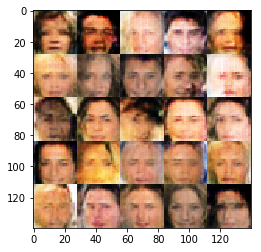

Epoch 1/2... Discriminator Loss: 1.4692... Generator Loss: 0.6764 Batch: 2820.0000
Epoch 1/2... Discriminator Loss: 1.5111... Generator Loss: 0.6000 Batch: 2840.0000
Epoch 1/2... Discriminator Loss: 1.3453... Generator Loss: 0.6688 Batch: 2860.0000
Epoch 1/2... Discriminator Loss: 1.4638... Generator Loss: 0.6066 Batch: 2880.0000
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.6849 Batch: 2900.0000


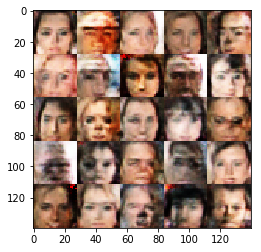

Epoch 1/2... Discriminator Loss: 1.3734... Generator Loss: 0.7999 Batch: 2920.0000
Epoch 1/2... Discriminator Loss: 1.4342... Generator Loss: 0.6972 Batch: 2940.0000
Epoch 1/2... Discriminator Loss: 1.3745... Generator Loss: 0.7164 Batch: 2960.0000
Epoch 1/2... Discriminator Loss: 1.4002... Generator Loss: 0.6702 Batch: 2980.0000
Epoch 1/2... Discriminator Loss: 1.4065... Generator Loss: 0.8057 Batch: 3000.0000


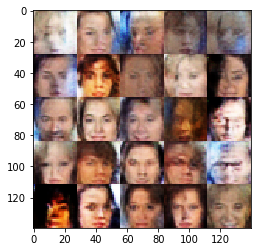

Epoch 1/2... Discriminator Loss: 1.4360... Generator Loss: 0.6147 Batch: 3020.0000
Epoch 1/2... Discriminator Loss: 1.3449... Generator Loss: 0.6386 Batch: 3040.0000
Epoch 1/2... Discriminator Loss: 1.3134... Generator Loss: 0.7707 Batch: 3060.0000
Epoch 1/2... Discriminator Loss: 1.4133... Generator Loss: 0.7203 Batch: 3080.0000
Epoch 1/2... Discriminator Loss: 1.4602... Generator Loss: 0.5118 Batch: 3100.0000


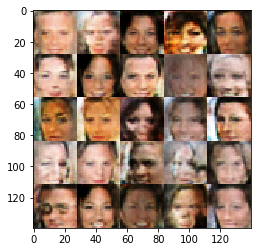

Epoch 1/2... Discriminator Loss: 1.5254... Generator Loss: 0.8105 Batch: 3120.0000
Epoch 1/2... Discriminator Loss: 1.3214... Generator Loss: 0.7632 Batch: 3140.0000
Epoch 1/2... Discriminator Loss: 1.4356... Generator Loss: 0.5199 Batch: 3160.0000
Epoch 2/2... Discriminator Loss: 1.3410... Generator Loss: 0.6733 Batch: 3180.0000
Epoch 2/2... Discriminator Loss: 1.4532... Generator Loss: 0.7149 Batch: 3200.0000


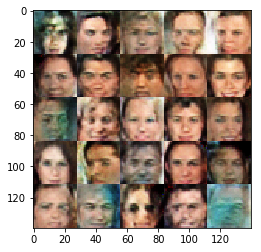

Epoch 2/2... Discriminator Loss: 1.3598... Generator Loss: 0.6719 Batch: 3220.0000
Epoch 2/2... Discriminator Loss: 1.3837... Generator Loss: 0.7532 Batch: 3240.0000
Epoch 2/2... Discriminator Loss: 1.3014... Generator Loss: 0.7612 Batch: 3260.0000
Epoch 2/2... Discriminator Loss: 1.3430... Generator Loss: 0.6526 Batch: 3280.0000
Epoch 2/2... Discriminator Loss: 1.5051... Generator Loss: 0.4485 Batch: 3300.0000


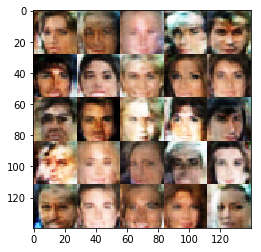

Epoch 2/2... Discriminator Loss: 1.4043... Generator Loss: 0.7528 Batch: 3320.0000
Epoch 2/2... Discriminator Loss: 1.3061... Generator Loss: 0.6574 Batch: 3340.0000
Epoch 2/2... Discriminator Loss: 1.4066... Generator Loss: 0.5826 Batch: 3360.0000
Epoch 2/2... Discriminator Loss: 1.3820... Generator Loss: 0.5956 Batch: 3380.0000
Epoch 2/2... Discriminator Loss: 1.3786... Generator Loss: 0.6676 Batch: 3400.0000


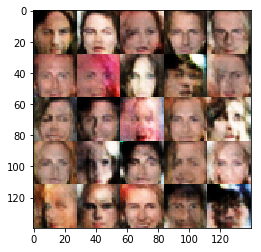

Epoch 2/2... Discriminator Loss: 1.5084... Generator Loss: 0.4454 Batch: 3420.0000
Epoch 2/2... Discriminator Loss: 1.4301... Generator Loss: 0.6771 Batch: 3440.0000
Epoch 2/2... Discriminator Loss: 1.4144... Generator Loss: 0.6697 Batch: 3460.0000
Epoch 2/2... Discriminator Loss: 1.4294... Generator Loss: 0.7054 Batch: 3480.0000
Epoch 2/2... Discriminator Loss: 1.3892... Generator Loss: 0.7382 Batch: 3500.0000


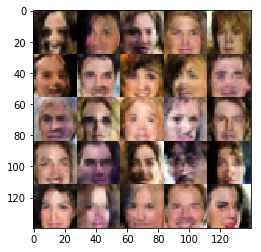

Epoch 2/2... Discriminator Loss: 1.2363... Generator Loss: 0.8219 Batch: 3520.0000
Epoch 2/2... Discriminator Loss: 1.4802... Generator Loss: 0.7069 Batch: 3540.0000
Epoch 2/2... Discriminator Loss: 1.3822... Generator Loss: 0.4979 Batch: 3560.0000
Epoch 2/2... Discriminator Loss: 1.4330... Generator Loss: 0.6800 Batch: 3580.0000
Epoch 2/2... Discriminator Loss: 1.3429... Generator Loss: 0.6542 Batch: 3600.0000


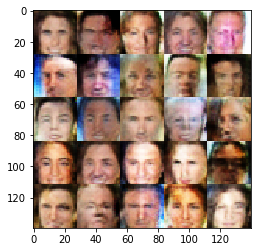

Epoch 2/2... Discriminator Loss: 1.3265... Generator Loss: 0.6742 Batch: 3620.0000
Epoch 2/2... Discriminator Loss: 1.3585... Generator Loss: 0.8364 Batch: 3640.0000
Epoch 2/2... Discriminator Loss: 1.4336... Generator Loss: 0.8232 Batch: 3660.0000
Epoch 2/2... Discriminator Loss: 1.3808... Generator Loss: 0.6002 Batch: 3680.0000
Epoch 2/2... Discriminator Loss: 1.4507... Generator Loss: 0.5209 Batch: 3700.0000


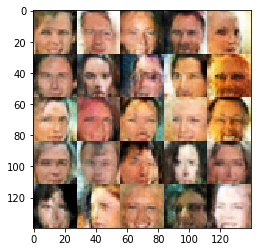

Epoch 2/2... Discriminator Loss: 1.4074... Generator Loss: 0.6916 Batch: 3720.0000
Epoch 2/2... Discriminator Loss: 1.3502... Generator Loss: 0.8092 Batch: 3740.0000
Epoch 2/2... Discriminator Loss: 1.4238... Generator Loss: 0.4885 Batch: 3760.0000
Epoch 2/2... Discriminator Loss: 1.4823... Generator Loss: 0.6219 Batch: 3780.0000
Epoch 2/2... Discriminator Loss: 1.5342... Generator Loss: 0.4008 Batch: 3800.0000


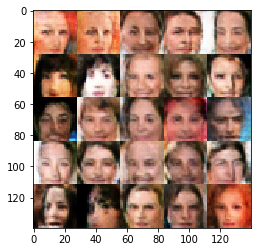

Epoch 2/2... Discriminator Loss: 1.3561... Generator Loss: 0.7387 Batch: 3820.0000
Epoch 2/2... Discriminator Loss: 1.2890... Generator Loss: 0.7074 Batch: 3840.0000
Epoch 2/2... Discriminator Loss: 1.4072... Generator Loss: 0.6470 Batch: 3860.0000
Epoch 2/2... Discriminator Loss: 1.4976... Generator Loss: 0.5195 Batch: 3880.0000
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 0.6586 Batch: 3900.0000


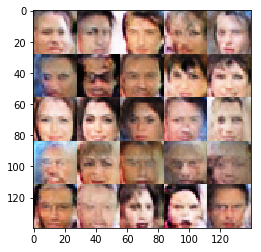

Epoch 2/2... Discriminator Loss: 1.3940... Generator Loss: 0.6632 Batch: 3920.0000
Epoch 2/2... Discriminator Loss: 1.3431... Generator Loss: 0.5868 Batch: 3940.0000
Epoch 2/2... Discriminator Loss: 1.3613... Generator Loss: 0.8200 Batch: 3960.0000
Epoch 2/2... Discriminator Loss: 1.4219... Generator Loss: 0.7615 Batch: 3980.0000
Epoch 2/2... Discriminator Loss: 1.4670... Generator Loss: 0.5865 Batch: 4000.0000


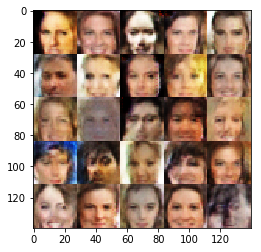

Epoch 2/2... Discriminator Loss: 1.3583... Generator Loss: 0.6210 Batch: 4020.0000
Epoch 2/2... Discriminator Loss: 1.3479... Generator Loss: 0.5749 Batch: 4040.0000
Epoch 2/2... Discriminator Loss: 1.3445... Generator Loss: 0.6193 Batch: 4060.0000
Epoch 2/2... Discriminator Loss: 1.4125... Generator Loss: 0.9890 Batch: 4080.0000
Epoch 2/2... Discriminator Loss: 1.3460... Generator Loss: 0.6022 Batch: 4100.0000


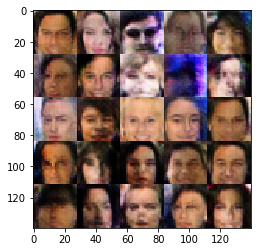

Epoch 2/2... Discriminator Loss: 1.3690... Generator Loss: 0.6306 Batch: 4120.0000
Epoch 2/2... Discriminator Loss: 1.4988... Generator Loss: 0.5972 Batch: 4140.0000
Epoch 2/2... Discriminator Loss: 1.2962... Generator Loss: 0.6954 Batch: 4160.0000
Epoch 2/2... Discriminator Loss: 1.3187... Generator Loss: 0.6382 Batch: 4180.0000
Epoch 2/2... Discriminator Loss: 1.3527... Generator Loss: 0.5758 Batch: 4200.0000


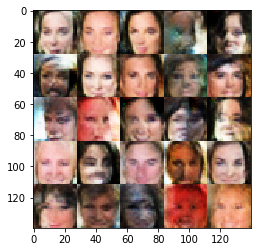

Epoch 2/2... Discriminator Loss: 1.2956... Generator Loss: 0.7108 Batch: 4220.0000
Epoch 2/2... Discriminator Loss: 1.3368... Generator Loss: 0.6647 Batch: 4240.0000
Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 0.7438 Batch: 4260.0000
Epoch 2/2... Discriminator Loss: 1.4852... Generator Loss: 0.6517 Batch: 4280.0000
Epoch 2/2... Discriminator Loss: 1.4253... Generator Loss: 0.6614 Batch: 4300.0000


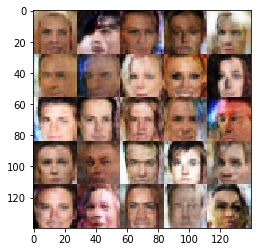

Epoch 2/2... Discriminator Loss: 1.2856... Generator Loss: 0.7643 Batch: 4320.0000
Epoch 2/2... Discriminator Loss: 1.5155... Generator Loss: 0.5213 Batch: 4340.0000
Epoch 2/2... Discriminator Loss: 1.4297... Generator Loss: 0.7929 Batch: 4360.0000
Epoch 2/2... Discriminator Loss: 1.3435... Generator Loss: 0.6702 Batch: 4380.0000
Epoch 2/2... Discriminator Loss: 1.3448... Generator Loss: 0.6620 Batch: 4400.0000


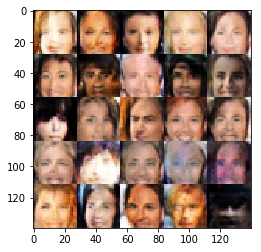

Epoch 2/2... Discriminator Loss: 1.3551... Generator Loss: 0.6261 Batch: 4420.0000
Epoch 2/2... Discriminator Loss: 1.3496... Generator Loss: 0.6680 Batch: 4440.0000
Epoch 2/2... Discriminator Loss: 1.3946... Generator Loss: 0.6862 Batch: 4460.0000
Epoch 2/2... Discriminator Loss: 1.5350... Generator Loss: 0.5064 Batch: 4480.0000
Epoch 2/2... Discriminator Loss: 1.3759... Generator Loss: 0.6047 Batch: 4500.0000


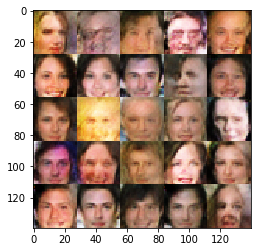

Epoch 2/2... Discriminator Loss: 1.5143... Generator Loss: 0.9850 Batch: 4520.0000
Epoch 2/2... Discriminator Loss: 1.3318... Generator Loss: 0.6217 Batch: 4540.0000
Epoch 2/2... Discriminator Loss: 1.3409... Generator Loss: 0.6362 Batch: 4560.0000
Epoch 2/2... Discriminator Loss: 1.4221... Generator Loss: 0.7004 Batch: 4580.0000
Epoch 2/2... Discriminator Loss: 1.4502... Generator Loss: 0.5508 Batch: 4600.0000


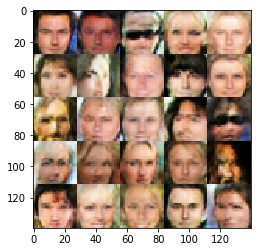

Epoch 2/2... Discriminator Loss: 1.3813... Generator Loss: 0.7497 Batch: 4620.0000
Epoch 2/2... Discriminator Loss: 1.3905... Generator Loss: 0.6584 Batch: 4640.0000
Epoch 2/2... Discriminator Loss: 1.2391... Generator Loss: 0.6860 Batch: 4660.0000
Epoch 2/2... Discriminator Loss: 1.3184... Generator Loss: 0.6066 Batch: 4680.0000
Epoch 2/2... Discriminator Loss: 1.4236... Generator Loss: 0.6169 Batch: 4700.0000


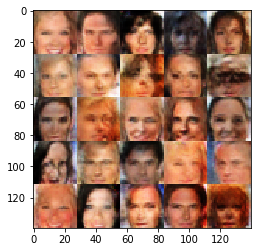

Epoch 2/2... Discriminator Loss: 1.2765... Generator Loss: 0.8431 Batch: 4720.0000
Epoch 2/2... Discriminator Loss: 1.4586... Generator Loss: 0.5129 Batch: 4740.0000
Epoch 2/2... Discriminator Loss: 1.3074... Generator Loss: 0.6649 Batch: 4760.0000
Epoch 2/2... Discriminator Loss: 1.3930... Generator Loss: 0.6147 Batch: 4780.0000
Epoch 2/2... Discriminator Loss: 1.4331... Generator Loss: 0.6317 Batch: 4800.0000


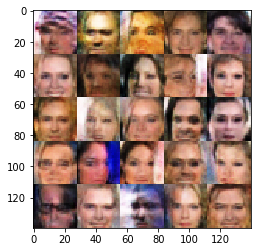

Epoch 2/2... Discriminator Loss: 1.3243... Generator Loss: 0.7427 Batch: 4820.0000
Epoch 2/2... Discriminator Loss: 1.4346... Generator Loss: 0.6193 Batch: 4840.0000
Epoch 2/2... Discriminator Loss: 1.3156... Generator Loss: 0.8612 Batch: 4860.0000
Epoch 2/2... Discriminator Loss: 1.3214... Generator Loss: 0.7297 Batch: 4880.0000
Epoch 2/2... Discriminator Loss: 1.4122... Generator Loss: 0.4833 Batch: 4900.0000


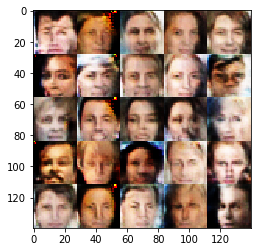

Epoch 2/2... Discriminator Loss: 1.2879... Generator Loss: 0.5551 Batch: 4920.0000
Epoch 2/2... Discriminator Loss: 1.4578... Generator Loss: 0.5062 Batch: 4940.0000
Epoch 2/2... Discriminator Loss: 1.3692... Generator Loss: 0.6177 Batch: 4960.0000
Epoch 2/2... Discriminator Loss: 1.3442... Generator Loss: 0.6601 Batch: 4980.0000
Epoch 2/2... Discriminator Loss: 1.3783... Generator Loss: 0.6190 Batch: 5000.0000


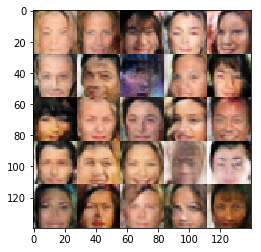

Epoch 2/2... Discriminator Loss: 1.3975... Generator Loss: 0.4608 Batch: 5020.0000
Epoch 2/2... Discriminator Loss: 1.4066... Generator Loss: 0.7285 Batch: 5040.0000
Epoch 2/2... Discriminator Loss: 1.3978... Generator Loss: 0.6126 Batch: 5060.0000
Epoch 2/2... Discriminator Loss: 1.3754... Generator Loss: 0.5641 Batch: 5080.0000
Epoch 2/2... Discriminator Loss: 1.4455... Generator Loss: 0.4941 Batch: 5100.0000


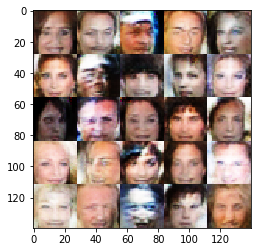

Epoch 2/2... Discriminator Loss: 1.3469... Generator Loss: 0.6063 Batch: 5120.0000
Epoch 2/2... Discriminator Loss: 1.3155... Generator Loss: 0.6659 Batch: 5140.0000
Epoch 2/2... Discriminator Loss: 1.4329... Generator Loss: 0.5895 Batch: 5160.0000
Epoch 2/2... Discriminator Loss: 1.4460... Generator Loss: 0.7921 Batch: 5180.0000
Epoch 2/2... Discriminator Loss: 1.4206... Generator Loss: 0.7774 Batch: 5200.0000


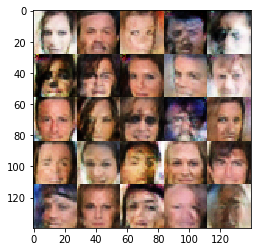

Epoch 2/2... Discriminator Loss: 1.4775... Generator Loss: 0.6026 Batch: 5220.0000
Epoch 2/2... Discriminator Loss: 1.3012... Generator Loss: 0.6785 Batch: 5240.0000
Epoch 2/2... Discriminator Loss: 1.3386... Generator Loss: 0.6525 Batch: 5260.0000
Epoch 2/2... Discriminator Loss: 1.3800... Generator Loss: 0.6545 Batch: 5280.0000
Epoch 2/2... Discriminator Loss: 1.3599... Generator Loss: 0.7270 Batch: 5300.0000


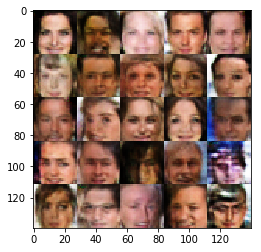

Epoch 2/2... Discriminator Loss: 1.3969... Generator Loss: 0.7677 Batch: 5320.0000
Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.5760 Batch: 5340.0000
Epoch 2/2... Discriminator Loss: 1.4169... Generator Loss: 0.7292 Batch: 5360.0000
Epoch 2/2... Discriminator Loss: 1.3627... Generator Loss: 0.7118 Batch: 5380.0000
Epoch 2/2... Discriminator Loss: 1.3156... Generator Loss: 0.6601 Batch: 5400.0000


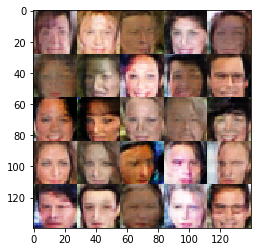

Epoch 2/2... Discriminator Loss: 1.4082... Generator Loss: 0.6928 Batch: 5420.0000
Epoch 2/2... Discriminator Loss: 1.4021... Generator Loss: 0.5417 Batch: 5440.0000
Epoch 2/2... Discriminator Loss: 1.3773... Generator Loss: 0.8170 Batch: 5460.0000
Epoch 2/2... Discriminator Loss: 1.3531... Generator Loss: 0.6258 Batch: 5480.0000
Epoch 2/2... Discriminator Loss: 1.3895... Generator Loss: 0.6460 Batch: 5500.0000


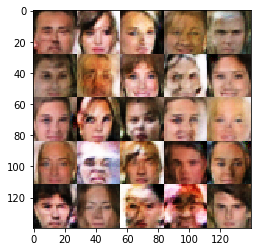

Epoch 2/2... Discriminator Loss: 1.4045... Generator Loss: 0.6844 Batch: 5520.0000
Epoch 2/2... Discriminator Loss: 1.3872... Generator Loss: 0.6846 Batch: 5540.0000
Epoch 2/2... Discriminator Loss: 1.3310... Generator Loss: 0.6642 Batch: 5560.0000
Epoch 2/2... Discriminator Loss: 1.4052... Generator Loss: 0.6941 Batch: 5580.0000
Epoch 2/2... Discriminator Loss: 1.3385... Generator Loss: 0.7019 Batch: 5600.0000


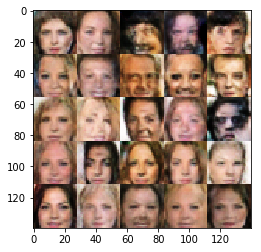

Epoch 2/2... Discriminator Loss: 1.3948... Generator Loss: 0.7028 Batch: 5620.0000
Epoch 2/2... Discriminator Loss: 1.3630... Generator Loss: 0.6243 Batch: 5640.0000
Epoch 2/2... Discriminator Loss: 1.3658... Generator Loss: 0.6843 Batch: 5660.0000
Epoch 2/2... Discriminator Loss: 1.3942... Generator Loss: 0.6017 Batch: 5680.0000
Epoch 2/2... Discriminator Loss: 1.3699... Generator Loss: 0.7149 Batch: 5700.0000


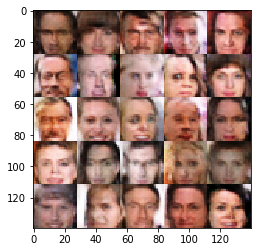

Epoch 2/2... Discriminator Loss: 1.3131... Generator Loss: 0.6175 Batch: 5720.0000
Epoch 2/2... Discriminator Loss: 1.3381... Generator Loss: 0.6989 Batch: 5740.0000
Epoch 2/2... Discriminator Loss: 1.4060... Generator Loss: 0.6227 Batch: 5760.0000
Epoch 2/2... Discriminator Loss: 1.3869... Generator Loss: 0.6551 Batch: 5780.0000
Epoch 2/2... Discriminator Loss: 1.3591... Generator Loss: 0.6319 Batch: 5800.0000


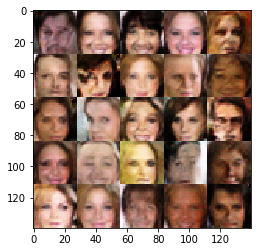

Epoch 2/2... Discriminator Loss: 1.4516... Generator Loss: 0.6529 Batch: 5820.0000
Epoch 2/2... Discriminator Loss: 1.4245... Generator Loss: 0.6280 Batch: 5840.0000
Epoch 2/2... Discriminator Loss: 1.4332... Generator Loss: 0.6780 Batch: 5860.0000
Epoch 2/2... Discriminator Loss: 1.3245... Generator Loss: 0.6549 Batch: 5880.0000
Epoch 2/2... Discriminator Loss: 1.3968... Generator Loss: 0.7406 Batch: 5900.0000


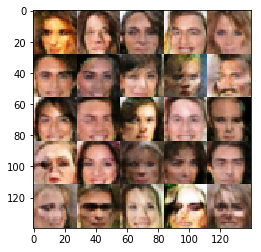

Epoch 2/2... Discriminator Loss: 1.4277... Generator Loss: 0.6157 Batch: 5920.0000
Epoch 2/2... Discriminator Loss: 1.4040... Generator Loss: 0.6588 Batch: 5940.0000
Epoch 2/2... Discriminator Loss: 1.4248... Generator Loss: 0.6218 Batch: 5960.0000
Epoch 2/2... Discriminator Loss: 1.5091... Generator Loss: 0.7200 Batch: 5980.0000
Epoch 2/2... Discriminator Loss: 1.3915... Generator Loss: 0.6738 Batch: 6000.0000


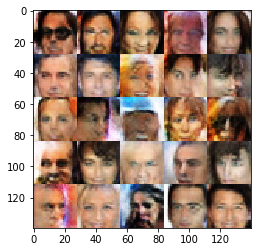

Epoch 2/2... Discriminator Loss: 1.3548... Generator Loss: 0.6561 Batch: 6020.0000
Epoch 2/2... Discriminator Loss: 1.4015... Generator Loss: 0.6675 Batch: 6040.0000
Epoch 2/2... Discriminator Loss: 1.4272... Generator Loss: 0.6795 Batch: 6060.0000
Epoch 2/2... Discriminator Loss: 1.4372... Generator Loss: 0.5610 Batch: 6080.0000
Epoch 2/2... Discriminator Loss: 1.4054... Generator Loss: 0.6302 Batch: 6100.0000


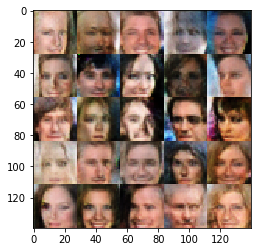

Epoch 2/2... Discriminator Loss: 1.3829... Generator Loss: 0.6727 Batch: 6120.0000
Epoch 2/2... Discriminator Loss: 1.3965... Generator Loss: 0.8568 Batch: 6140.0000
Epoch 2/2... Discriminator Loss: 1.3782... Generator Loss: 0.7477 Batch: 6160.0000
Epoch 2/2... Discriminator Loss: 1.4314... Generator Loss: 0.6460 Batch: 6180.0000
Epoch 2/2... Discriminator Loss: 1.3567... Generator Loss: 0.7325 Batch: 6200.0000


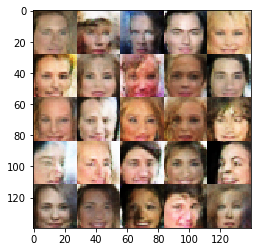

Epoch 2/2... Discriminator Loss: 1.3467... Generator Loss: 0.6260 Batch: 6220.0000
Epoch 2/2... Discriminator Loss: 1.3791... Generator Loss: 0.7081 Batch: 6240.0000
Epoch 2/2... Discriminator Loss: 1.3755... Generator Loss: 0.6553 Batch: 6260.0000
Epoch 2/2... Discriminator Loss: 1.4091... Generator Loss: 0.5697 Batch: 6280.0000
Epoch 2/2... Discriminator Loss: 1.3483... Generator Loss: 0.7227 Batch: 6300.0000


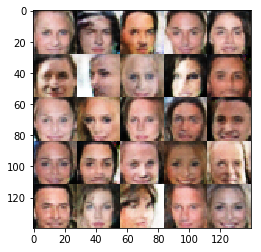

Epoch 2/2... Discriminator Loss: 1.3604... Generator Loss: 0.6929 Batch: 6320.0000


In [46]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.35
d_losses = []
g_losses = []

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    d_losses, g_losses = train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

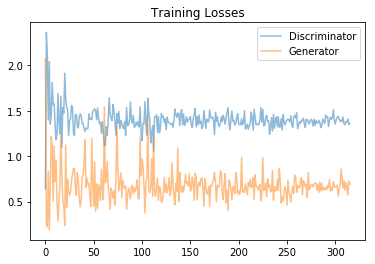

In [47]:
plot_losses(d_losses, g_losses)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.